# Predicting Video Game Sales

## Preface
The following text is a slightly revised version of my capstone project report for completing the "Machine Learning Engineer" course at [Udacity](https://www.udacity.com/course/machine-learning-engineer-nanodegree--nd009). If you're interested, you can also have a [look at my github repository](https://github.com/otacke/udacity-machine-learning-engineer).

It was more difficult than I thought to come up with a proposal for a capstone project. There are tons of interesting datasets out there and dozens of questions that you could possibly ask, but I would have loved to create something that someone actually needed.

I contacted a friend of mine who co-created [OpenSNP](https://opensnp.org/), a platform hosting raw genotype data. In fact, he could need someone to use labeled data from [1000Genomes](http://www.internationalgenome.org/) in order to create a classifier that would tell you what's the origin of genetic data. Unfortunately, my knowledge of biology is too poor. Anyway, what I learned form this inquiry is how important domain knowledge and interdisciplinary teams are for data science and machine learning.

I chose to have a closer look at the field of education where I know a thing or two. I found a paper that dealt with undergraduate student generic problem-solving skills. It was based on an empirical study that had produced some data. It could have been used for creating a predictive model for problem solving skills performance, for detecting/classifying sub-groups of students, etc. Unfortunately, the data was not freely available. We need more Open Science! I contacted the author, but I guess he was more afraid of "losing" his data than excited about getting new tools he could use. He wanted to have my resume - that he received - but I never heard of him again.

Well, I browsed the web for some more datasets and found something that would be interesting for me, that might have an appropriate level of difficulty, and that (hopefully) doesn't require domain knowledge that I don't possess: this dataset.

## I. Definition

### Project Overview
One of the first video games that I have ever played in my life was [Munchkin](https://en.wikipedia.org/wiki/Munchkin_(video_game)). It was released in 1981 when the video game industry was still in its infancy. Today, it is a multi-billion dollar business. In 2014 in the U.S. alone, 155 million people played video games (cmp. [Entertainment Software Association, 2015](http://www.theesa.com/wp-content/uploads/2015/04/ESA-Essential-Facts-2015.pdf), p. 2). In total, they spent 15.4 billion US dollars (cmp. [Entertainment Software Association, 2015](http://www.theesa.com/wp-content/uploads/2015/04/ESA-Essential-Facts-2015.pdf), p. 12).

In an industry, success is not only measured in good critics, but the amount of money earned or units sold. In order to make decisions about future productions, publishers may want to predict the sales figures which they can expect after a new game has been released. Those decisions could possibly be based on historical data and a suitable regression model. For instance, we could hypothesize that good scores in reviews correlate positively with high sales figures. Also, we could assume, that those reviews could help us to project future sales. In fact, the general plausibility of this approach has been investigated and proven for the movie picture industry a decade ago: "Online movie reviews are available in large numbers within hours of a new movie’s theatrical release. Their use, thus, allows the generation of reliable forecasts much sooner than before." ([Dellarocas, Zhang & Awad, 2007](http://onlinelibrary.wiley.com/doi/10.1002/dir.20087/abstract), p. 39). For the video game industry, [Beaujon (2012)](https://www.few.vu.nl/nl/Images/werkstuk-beaujon_tcm243-264134.pdf) developed a third-degree polynomial formula for predicting sales from historical data -- basically manually using a spreadsheet.

In this report, I present a machine learning approach to this problem that uses more features and more data. It is based on a dataset about video game sales that uses data scraped from VGChartz ([Video Game Sales with Ratings](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)). It contains information about games, including name, platform, year of release, genre, and sales figures for several regions. This dataset has been extended with several features from Metacritic, adding e.g. quality ratings from metacritic's staff and from users, the amount of reviews, and also adding age/content ratings from the entertainment software rating board. In total, there are more that 6.000 complete cases.

### Problem Statement
The earlier a video game company knows how many copies it can expect to sell of a game, the earlier it can estimate the revenue and the earlier it knows whether the game will be a financial success or not. For example, a decision about starting the production of a sequel or the production of a port to a different platform might depend on this information. In consequence, early knowledge about the sales figures can speed up the decision process.

The solution to the problem will be a regression model that can be fed with the variables that have been mentioned in the previous section, and it will output a prediction of sales figures for a video game.

Based on the problem definition above, the dataset will be analyzed and prepared. First, the data quality will be checked on a syntactical level. For example, columns that are expected to contain numbers should not contains strings. After that step, it is crucial to understand the data before experimenting with algorithms. Data will be checked for plausibility, because some feature values might be off the chart for whatever reason, etc. Also, by visualizing the data in different ways, we will get some more insight into the problem.

Subsequently, suitable algorithms will be selected. There are different approaches that might be appropriate for building a regression model and should be considered. Although quite a lot algorithms might suit the problem, the right choice depends on different criteria, such as efficiency and scalability. Since we are dealing with more than 50 but less than 100.000 samples for predicting a quantity, the [Scikit-Learn cheat-sheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/) suggests to consider Lasso, Elastic Net, Ridge Regression, Support Vector machines or even Ensemble Regressors. Out of curiosity, we might also tinker with neural networks.

The next step will be to run and evaluate the algorithms that we have chosen. By comparing each algorithm's performance using cross validation, we can identify the algorithms that are best at "understanding" the data and at attacking the prediction of video game sales.

As a final step we are going to improve and finalize the results with focused experiments and fine tuning. Each algorithm has certain parameters that can be tweaked in order to get better results. Approaches such as a grid search will be helpful to support this task systematically. Possibly, even ensemble methods will be tried out for improving the results.

### Metrics
The goal of this project is to predict the sales volume of video games, which simply is an integer. We can apply common statistics to compare and visualize the deviation of the predictions from the real results. The explained variance score or the [R² score](https://en.wikipedia.org/wiki/Coefficient_of_determination) could be used to quantify the performance of our model. It indicates how much of the variance within a dataset can be explained by a model.

Using this score, we can check our model for being prone to high bias or high variance. One method is to split our data into a training set that's used for training the model and a test set for testing its performance. This way we can identify and reduce underfitting or overfitting. Also, plotting the learning curves (training error and the cross validation error in relation to the training set size) can offer insight related to high bias, high variance, and to appropriate options for improvement such as collecting more samples or more features.

Instead of splitting the dataset, we can also use new data from the data sources (VGChartz, Metacritics) that are not available yet. This would basically be a real world test.

## Preparation
Before we start our analysis, let prepare ourselves. We'll need to import some libraries. We're also going to create some functions as we go, because we are going to use some things several times.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import scipy as sp
import time

import matplotlib.pyplot as plt

# Allows the use of display() for DataFrames
from IPython.display import display

# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn import svm

# more stuff
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
from collections import Counter
from scipy.stats import skew, skewtest

# make pretty
plt.style.use('ggplot')

# Pretty display for notebooks
%matplotlib inline

## II. Analysis

### Data Exploration
We can start our analysis by looking at the dataset given the following characteristics:

| TITLE           | DESCRIPTION                                                | DATA TYPE |
| --------------- | ---------------------------------------------------------- | --------- |
| Name            | Name of the game                                           | String    |
| Platform        | Hardware Platform                                          | String    |
| Year_of_Release | Year of release                                            | Numeric   |
| Genre           | Game genre                                                 | String    |
| Publisher       | Publisher                                                  | String    |
| NA_Sales        | Game sales in North America (in millions of units)         | Numeric   |
| EU_Sales        | Game sales in the European Union (in millions of units)    | Numeric   |
| JP_Sales        | Game sales in Japan (in millions of units)                 | Numeric   |
| Other_Sales     | Game sales in the rest of the world (in millions of units) | Numeric   |
| Global_Sales    | Total sales in the world (in millions of units)            | Numeric   |
| Critic_Score    | Aggregate score compiled by Metacritic staff               | Numeric   |
| Critic_Count    | The number of critics who generated the Critic_Score       | Numeric   |
| User_Score      | Score by Metacritic's subscribers                          | Numeric   |
| User_Count      | Number of subscribers who gave the User_Score              | Numeric   |
| Developer       | Party responsible for creating the game                    | String    |
| Rating          | The [ESRB](https://www.esrb.org/) ratings                  | String    |

Table: Dataset Features

In [2]:
def loadDataset(cleaned=True):
    """Return the dataset that we're going to experiment with.
    
    arguments:
    cleaned -- indicate if to use manually cleaned dataset instead of the raw dataset (default True)
    """
    if (cleaned):
        try:
            dataset = pd.read_csv("data/Video_Games_Sales_as_at_22_Dec_2016_cleaned.csv")
        except:
            display("Dataset could not be loaded. Is the dataset missing?")
    else:
        try:
            dataset = pd.read_csv("data/Video_Games_Sales_as_at_22_Dec_2016.csv")

            # Some general cleaning that doesn't change any results but makes analysis possible
           
            # tbd to NaN (needed for uncleaned dataset)
            dataset = dataset.copy().replace('tbd', float('NaN'))

            # correct data types (needed for uncleaned dataset)
            dataset['User_Score'] = dataset.copy()['User_Score'].apply(pd.to_numeric)
        except:
            display("Dataset could not be loaded. Is the dataset missing?")
            
    return dataset

In [3]:
def showDatasetInfos(dataset):
    """Show some information about the dataset.
    
    arguments:
    dataset -- the dataset to have a look at
    """    
    if (~dataset.empty):
        # Display a description of the datasets
        display("Dataset has {} samples with {} possible features.".format(*dataset.shape))
        display('NUMBER OF NaNs')
        display([dataset.shape[0]] * dataset.shape[1] - dataset.count())
        display(dataset.describe())
        display(dataset.head())
        display(dataset.tail())

In [4]:
def showColumnInfos(dataset):
    """Display number of unique values for each column
    
    arguments:
    dataset -- dataset to look at
    """
    if (~dataset.empty):
        print ('DATASET ROWS: {}'.format(*dataset.shape))
        for item in dataset.keys():
            print ('Unique values for column \'{}\': {}'.format(item, dataset[item].unique().size))

In [5]:
def showCorrelations(dataset, threshold = None):
    """Show correlations.
    
    arguments:
    dataset   -- the dataset to have a look at
    threshold -- the threshold as of which correlations should be shown
    """ 
    if ((type(threshold) != float) & (type(threshold) != int)):
        display(dataset.corr())
    else:
        display(dataset.corr()[abs(dataset.corr()) > threshold])

In [6]:
def computeSkewness(dataset):
    """Compute skewness information for features.
    
    arguments:
    dataset   -- the dataset to have a look at
    """ 
    for feature in dataset.keys():
        if dataset[feature].dtype != object:
            print ('skewness for {} is: {} (p={})'.format(feature, skew(dataset[feature]), skewtest(dataset[feature])[1]))

In [7]:
# load the raw dataset without any modifications
dataset = loadDataset(cleaned=False)

In [8]:
# get some info about the dataset
showDatasetInfos(dataset)
showColumnInfos(dataset)
showCorrelations(dataset, 0.7)
computeSkewness(pd.DataFrame(dataset))

'Dataset has 16719 samples with 16 possible features.'

'NUMBER OF NaNs'

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

C:\Users\tackeo\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,NaN,NaN,NaN,NaN
50%,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,NaN,NaN,NaN,NaN
75%,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,NaN,NaN,NaN,NaN
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


DATASET ROWS: 16719
Unique values for column 'Name': 11563
Unique values for column 'Platform': 31
Unique values for column 'Year_of_Release': 40
Unique values for column 'Genre': 13
Unique values for column 'Publisher': 582
Unique values for column 'NA_Sales': 402
Unique values for column 'EU_Sales': 307
Unique values for column 'JP_Sales': 244
Unique values for column 'Other_Sales': 155
Unique values for column 'Global_Sales': 629
Unique values for column 'Critic_Score': 83
Unique values for column 'Critic_Count': 107
Unique values for column 'User_Score': 96
Unique values for column 'User_Count': 889
Unique values for column 'Developer': 1697
Unique values for column 'Rating': 9


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,NaN,1.000000,0.765336,NaN,NaN,0.941010,NaN,NaN,NaN,NaN
EU_Sales,NaN,0.765336,1.000000,NaN,0.722796,0.901239,NaN,NaN,NaN,NaN
JP_Sales,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Other_Sales,NaN,NaN,0.722796,NaN,1.000000,0.749242,NaN,NaN,NaN,NaN
Global_Sales,NaN,0.941010,0.901239,NaN,0.749242,1.000000,NaN,NaN,NaN,NaN
Critic_Score,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Critic_Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
User_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
User_Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


skewness for Year_of_Release is: nan (p=nan)
skewness for NA_Sales is: 18.7721059185 (p=0.0)
skewness for EU_Sales is: 18.8512475606 (p=0.0)
skewness for JP_Sales is: 11.2077634716 (p=0.0)
skewness for Other_Sales is: 24.5840767282 (p=0.0)
skewness for Global_Sales is: 17.37643056 (p=0.0)
skewness for Critic_Score is: nan (p=nan)
skewness for Critic_Count is: nan (p=nan)
skewness for User_Score is: nan (p=nan)
skewness for User_Count is: nan (p=nan)


The raw dataset ([Video_Games_Sales_as_at_22_Dec_2016.csv](data/Video_Games_Sales_as_at_22_Dec_2016.csv)) offers 16 features and 16719 data points.

Looking for high correlations within the dataset hardly reveals anything surprising. There are very high correlations between the global sales volume and the sales volume of North America (0.94) and Europe (0.90) respectively, because those two are the biggest markets contributing the most to the total sum. Still, there's a fairly high correlation between the other countries excluding Japan and the global sales volume (0.75). Also, there's a pretty high correlation between Europe and North America (0.77) and between Europe and other countries excluding Japan (0.72), suggesting that Europe could be a linking pin between the tastes of the other regions. That's it. The Japanese market seems to work differently.

#### Formal abnormalities
There are some obvious formal abnormalities. For instance, the years of release range from 1977 to 2020, so there must be at least one invalid entry or we're facing a temporal anomaly and should check the chronoton levels. We can also clearly see that Metacritic doesn't provide scores for all the games that have been listed at VGChartz. There are 8582 rows without a Critic Score and even 9129 rows without a User Score. In addition, not all games contain information about their publisher, developer or their rating.

A closer look at the data reveals that there are 269 games without a year of release, mostly for Japanese releases or for old Atari 2600 games. We can also note that there are quite some games that seem to have been released in Japan only. Some of those have an extra row for Japan sales instead of using just one for all the different regional sales.

Furthermore, we can come across a fun fact: In Germany, until 2002 it was forbidden to sell the game "River Raid" from 1982 with its clunky graphics and sound. It was said to resemble a paramilitary training and could cause muscle cramps, anger, aggressiveness, absent-mindedness, and headaches.(cmp. [http://www.simulationsraum.de/blog/2011/03/31/river-raid-rage/](http://www.simulationsraum.de/blog/2011/03/31/river-raid-rage/)) The game sold more than 1.6 million copies which is quite a lot even for modern games. It was a top seller.

Finally, there are some cells containing the string 'tbd' instead of a proper NaN/None, some cells contain double spaces within strings, and the Critic Score and User Score are scaled differently. While the former ranges from 0 to 100, the latter ranges from 0 to 10.

#### Statistical abnormalities
One of the aspects of statistical abnormalities is the subject of outlier identification. "Sample outliers can be identified asof two basic types. Here we are concerned with the first type, which may conveniently be termed representative outliers. These are sample elements with values that have been correctly recorded and that cannot be assumed to be unique. That is, there is no good reason to assume there are no more similar outliers in the nonsampled part of the target population. The remaining sample outliers, which by default are termed nonrepresentative, are sample elements whose data values are incorrect or unique in some sense." (Chambers, 1986, p. 1063). Some of those nonrepresentative elements have already been mentioned above, e.g. games from 2020.

When we investigate the feature of global sales, we can easily identify some games with very high sales volumes. For example, the top selling game is said to have been sold more than 82 million times and the tenth highest selling game still more than 28 million times -- whereas the mean value of global sales is at merely 0.53 million copies and the median at 0.17. Fortunately, there's an explanation. The "seemingly" top selling game is "Wii Sports", which in fact went over the counter that often, but probably only because it came as a bundle with the Wii console in 2006. People bought it whether they wanted to or not and without paying respect to critics. The same is true for a lot of the top selling titles in the raw dataset.

In [9]:
display(dataset[['Name', 'Global_Sales']].sort_values(['Global_Sales'], ascending=False).head())
print ('Global Sales mean: {:.2f}'.format(dataset[['Global_Sales']].mean()[0]))
print ('Global Sales median: {:.2f}'.format(dataset[['Global_Sales']].median()[0]))

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.37


Global Sales mean: 0.53
Global Sales median: 0.17


Those and other titles have probably been recorded correctly. Yet they could be considered outliers. Alternatively, we could suggest to add a feature that indicates that the game had been bundled with hardware and might account for the tremendous sales volume.

We can also detect very large values for the number of votes that come from customers. For example, the game "The Witcher 3" for the PC received over 10,000 votes while the mean value is at roughly 162 votes and the median at 24. It is eye-catching that the games with the highest user count also have a very high user score -- at least most of the time. There are some exceptions, e.g. Diablo III for the PC. It received a critic score of 88 and was praised, yet the user score is just average. It seems that many people gave a very bad score, presumably because the game forced users to be online in order to be able to even play the game in single-player mode. The high count seems to either confirm love or hate for a game.

In [10]:
display(dataset[['Name', 'User_Score', 'User_Count']].sort_values(['User_Count'], ascending=False).head())
print ('User Count mean: {:.0f}'.format(dataset[['User_Count']].mean()[0]))
print ('User Count median: {:.0f}'.format(dataset[['User_Count']].median()[0]))

,Name,User_Score,User_Count
2851,The Witcher 3: Wild Hunt,9.3,10665.0
303,The Witcher 3: Wild Hunt,9.2,10179.0
11288,Counter-Strike: Source,8.9,9851.0
192,Diablo III,4.0,9629.0
313,The Elder Scrolls V: Skyrim,8.1,9073.0


User Count mean: 162
User Count median: 24


Given some of the statistical information above we can already assume that some of the features are skewed, e.g. sales volume or user count. The visualizations in the next chapter will show this fact more clearly, but just looking at the median, mean and standard deviation of the numerical values suggests that merely critic score, critic count and user score could be fairly normally distributed.

### Exploratory Visualization
We start by looking at some of the aspects that have already been discussed above.

In [11]:
def plotCorrelationsSales(dataset, filename=None):
    """Plot (and save) correlations of Sales for all regions
    
    arguments:
    dataset -- the dataset to look at
    filename -- filename for saving the plot as an image
    """
    matrix_dataset = dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
    axes = scatter_matrix(matrix_dataset, alpha=0.2, figsize=(12, 12), diagonal='kde')
    plt.suptitle('Correlations', fontsize=16)
    if (type(filename) == str):
        plt.savefig(filename)

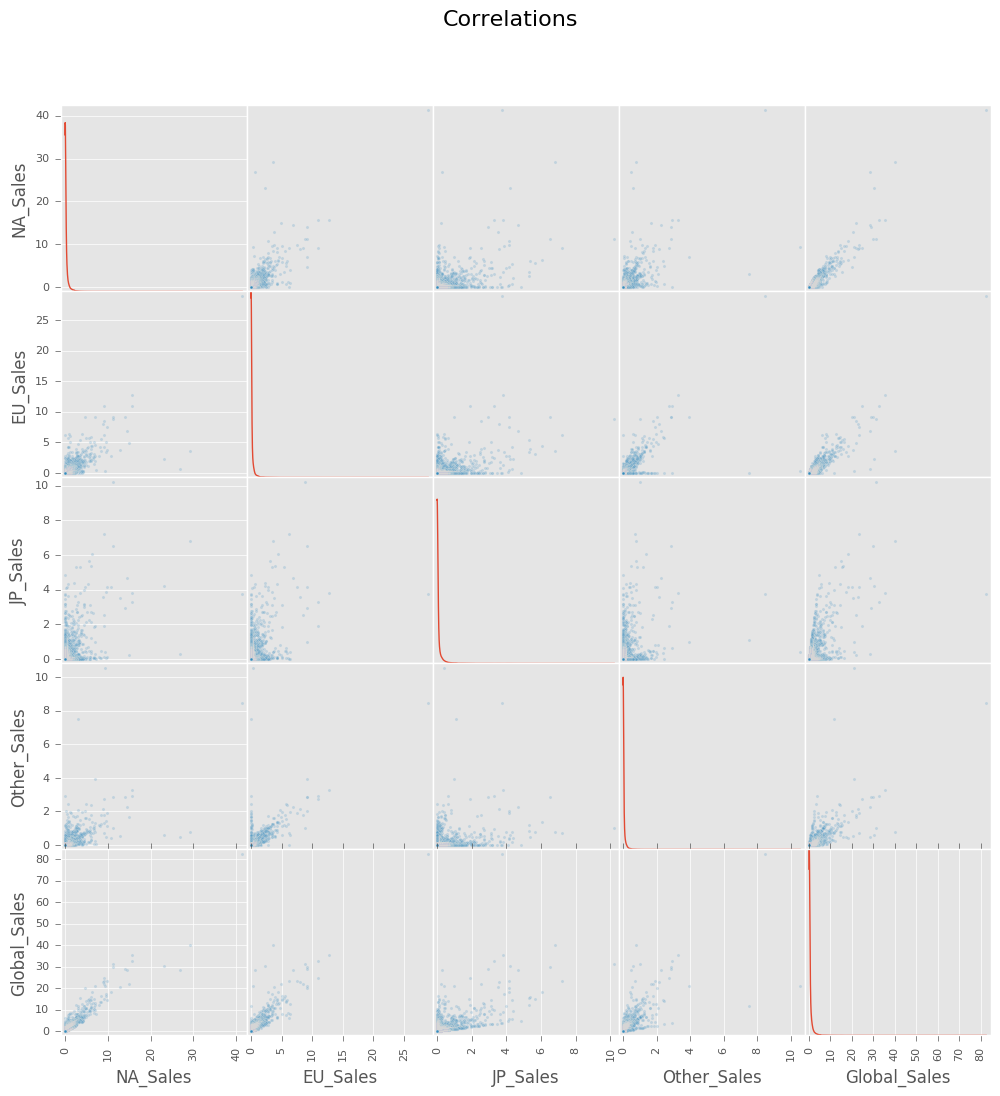

In [12]:
plotCorrelationsSales(dataset)

For instance, we talked about the correlations between local sales and global sales. We can spot the very high positive correlations between North American sales and global sales and between EU sales and global sales easily. In the corresponding subplots, we see a thick straight line from the lower left corner to the upper right corner. It could be seen even better if we had got rid of the extreme sales numbers for games that have been sold with a console.

For this project, we could try to create regressors for each region, but since the regional sales volumes are highly correlated with the global sales (except for Japan), we are just trying to predict the latter.

In [13]:
def plotScoresVsSales(dataset, filename=None):
    """Plot Critic Score vs. Global Sales and User Score vs. Global Sales
    
    dataset -- the dataset to look at
    filename -- filename for saving the plot as an image
    """
    fig = plt.figure(figsize=(12,6))

    # Critic Score vs. Global Sales
    maxy = dataset['Global_Sales'].max() + 5
    ax = fig.add_subplot(121, xlim=(-2.5,102.5), ylim=(-2.5, maxy), title='Critic Score vs. Global Sales\n')
    ax.set_xlabel('Critic Score')
    ax.set_ylabel('Global Sales')
    ax.plot(dataset.Critic_Score, dataset.Global_Sales, marker='.', linestyle='')

    # User Score vs. Global Sales
    ax = fig.add_subplot(122, xlim=(-2.5,102.5), ylim=(-2.5, maxy), title='User Score vs. Global Sales\n')
    ax.set_xlabel('User Score')
    ax.set_ylabel('Global Sales')
    ax.plot(dataset.User_Score, dataset.Global_Sales, marker='.', linestyle='')    

    plt.show()
    if (type(filename) == str):
        fig.savefig(filename)

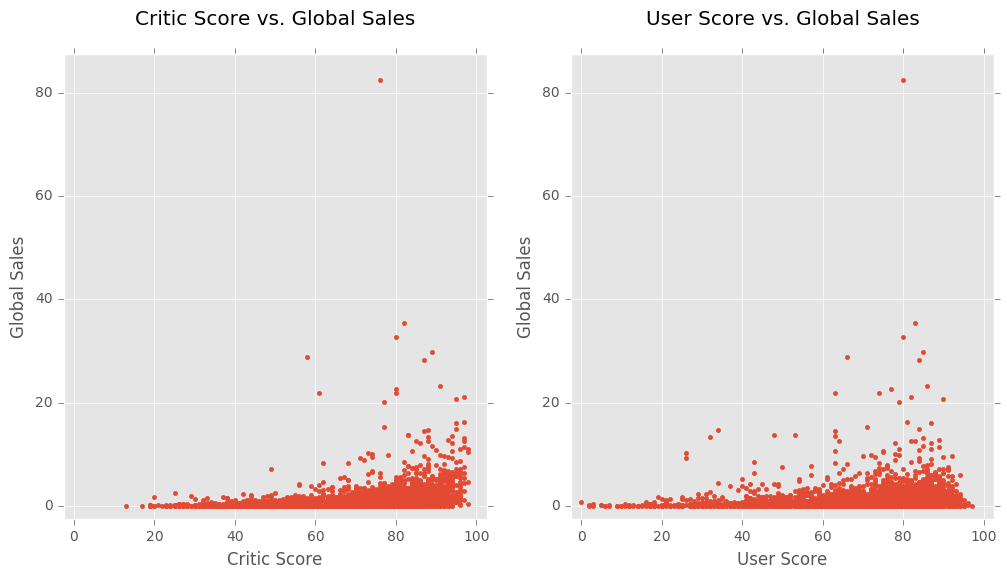

In [14]:
# match scale of Critic Score and User Score
dataset['User_Score'] = dataset['User_Score'] * 10

plotScoresVsSales(dataset)

For creating a regressor, we hope to have some features that account for a large portion of the final outcome, and our best hope are the scores awarded by critics and users. We could assume that there's a positive correlation: The higher the score, the higher the sales volume. We already know that this doesn't hold true entirely. There is a positive correlation between each score and the global sales, but it is far from being significant. We can check this by plotting the scores and the global sales. Obviously, the scores tell us a little bit since the sales volume seems to be higher if the score is high, but there are also many games with very good ratings but low sales.

In [15]:
def plotScoreComparison(dataset, filename=None):
    """Plot Critic Score vs. User Score
    
    dataset -- the dataset to look at
    filename -- filename for saving the plot as an image
    """
    fig = plt.figure(figsize=(12,6))

    # General comparison
    ax = fig.add_subplot(111, xlim=(-2.5,102.5), ylim=(-2.5,102.5), title='Critic Score and User Score\n', aspect=1)
    ax.set_xlabel('Critic Score')
    ax.set_ylabel('User Score')
    ax.plot(dataset.Critic_Score, dataset.User_Score, marker='.', linestyle='')

    plt.show()
    if (type(filename) == str):
        fig.savefig(filename)

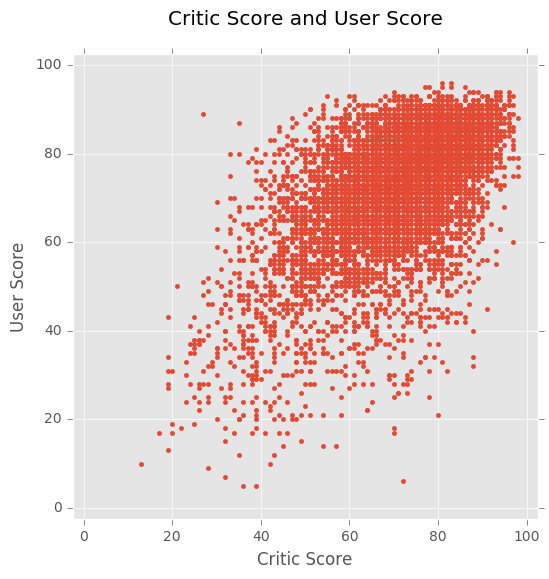

In [16]:
plotScoreComparison(dataset)

If we have a closer look at the relationship between the score that critics awarded and the score that users awarded, we in fact notice that they are kind of correlated, but there's a lot of variation and the plot forms a longish cloud in the upper right corner (Please note that we already scaled the user score by a factor of 10 in order to get nice square plots). Obviously, critics and users alike tend to award scores above average more often then scores below average. This allows us to "see" that both features are skewed and don't portray a normal distribution.

In [17]:
def plotDistributions(dataset, filename=None):
    """Plot Distributions for scores, counts and global sales
    
    dataset -- the dataset to look at
    filename -- filename for saving the plot as an image
    """
    matrix_dataset = dataset[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']]
    axes = scatter_matrix(matrix_dataset, alpha=0.2, figsize=(12, 7), diagonal='kde')
    plt.suptitle('Distributions', fontsize=16)
    if (type(filename) == str):
        plt.savefig(filename)

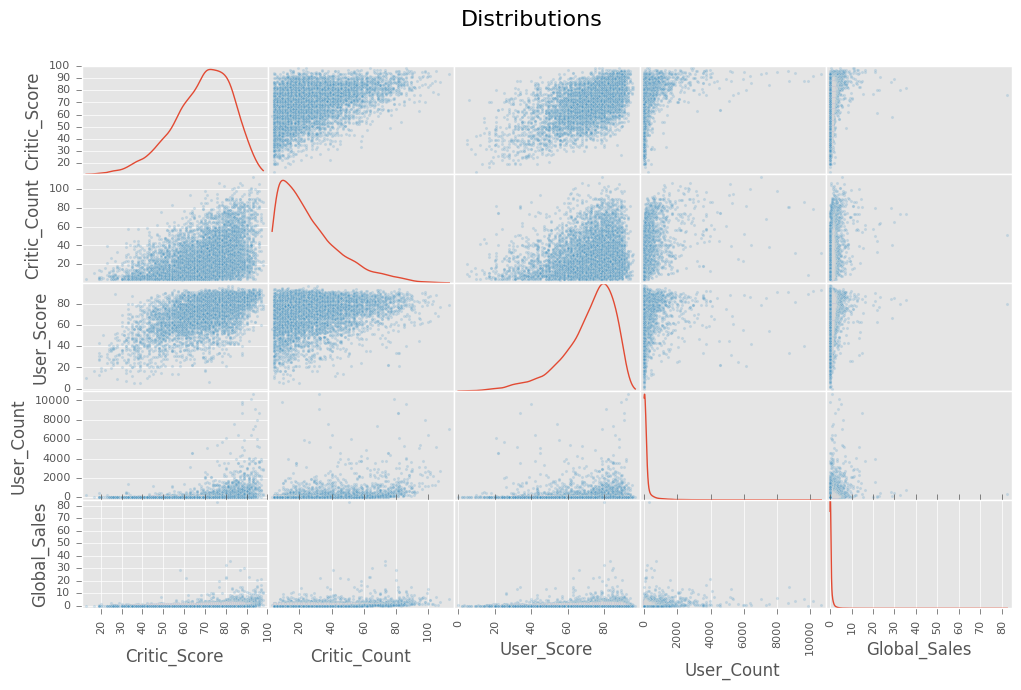

In [18]:
plotDistributions(dataset)

Of course, we can also check the distributions directly by using a scatter matrix. It shows the numeric features that we could possibly transform. This wouldn't make sense for the year of release, and the sales numbers are skewed to such a large degree that assuming a normal distribution might be a wrong premise. We can see that both, the distribution for the critic score and for the user score, are skewed negatively, the latter a little more than the former. On the other hand both counts are skewed positively considerably, the user count to such a large degree that transforming it to resemble a normal distribution might not be a wise decision.

### Algorithms and Techniques
As we stated above, the dataset may not be ready for use and data cleansing might be in place. There are lots of incomplete samples. Some information can be gathered or corrected manually. For example, we are going to add missing years of release. Some rows with missing scores will be removed. In the data preprocessing stage, we are also going to deal with outliers. Finally, before building a model, we should consider to scale the data and possibly also to transform some features in order to get more normal distributions.

After these steps, we can decide which algorithm we should use. According to the [Scikit-Learn Algorithm Cheat-Sheet](http://scikit-learn.org/stable/tutorial/machine_learning_map), for regressors with less than 100.000 samples we shoulg e.g. use Lasso and Elastic Net, but we cannot be sure that only few features should be important. Alternatively, we should use Ridge Regression and Support Vector Machines with different kernels or even ensemble methods.

Lasso, Elastic Net and Ridge Regression are linear regression algorithms that use regularization to prevent overfitting. They all offer the following parameters that we can use for tuning:

- `alpha` is a positive float that indicates the strength of the regularization. The larger the values are, the stronger the effect. Of course, very large values will lead to too simple models that cannot predict anything.
- `fit_intercept` is set to True by default and setting it to False assumes that the data is centered. Since we have very skewed data, using False should produce worse results.
- `normalize` is set to False by default and can be used to, well, normalize the dataset before regression.
- `max_iter` is the number of iterations. Larger values may produce better results.

Elastic Net Regression additionally gives us the parameter _l1_ratio_ that we might tweak:

- `l1_ratio` is a float between 0 and 1 that determines the type of regularization. If close to 1, the penalty will be of type L2, and if close to 0, it will rather be like type L1.

Ridge Regression additionally provides us with the the parameter _solver_ to set:

- `solver` allows us to choose from different computational routines, but can also be set to 'auto' in order to choose the solver automatically based on the type of data.

Furthermore, we can use a Support Vector Regressor which can be very effective in in high dimensional spaces, and we can also use the kernel trick to create non-linear decision boundaries in order to capture very complex patterns in the data that the linear models fail to grasp. Support vector machines don't perform well on large training datasets, but ours is still fine.

The following parameters might be worth tuning:

- `C` is the regularization parameter of support vector machines. The higher the value of C, the less the model tolerates errors (uses a hard margin) and the more prone to overfitting it becomes.
- `epsilon` determines the number of support vectors that will be used to define the margin. Increasing epsilon will decrease the number of support vectors and reduce the danger of overfitting, but contrarywise the solution may be less accurate.
- `kernel` defines the way how the computation is virtually transferred to a higher dimensional space. An appropriate kernel can help us to deal with non-linear problems, and 'rbf' seems to be the right choice.
- `gamma` defines the sphere of influence that a single training example has. If _gamma_ is low, then the sphere of influence is large and more samples affect the definition of the margin. Vice versa, high values reduce the number of samples defining the margin, but may cause overfitting.

In order to get a more robust result, we are going to apply cross validation (ShuffleSplit): We are going to randomly split our dataset into a training set and a test set several times and compare the performance on both sets. This way we will be able to detect overfitting and underfitting and decide what we can do to improve the results.

### Benchmark
There are some people at Kaggle who seem to be experimenting with the dataset, too. For example, [Jonathan Bouchet built a polynomial regression model in R and reports an R² score of 0.098404](https://www.kaggle.com/jonathanbouchet/d/rush4ratio/video-game-sales-with-ratings/vg-sales-score-prediction/notebook). Since Bouchet barely preprocessed the data and did not try other algorithms, we can be quite optimistic that we can come up with a better result.

## III. Methodology

### Data Preprocessing
The first phase of our data preprocessing was general cleaning. It was performed manually on the dataset itself, because those steps can be useful for anyone.

We had to correct some entries of the feature "user score" that contained the string "tbd" instead of a numeric value. Those were replaced by "NaN", because without these changes the data type of the feature would not be detected correctly by Pandas. Afterwards, we deleted some double spaces and leading and trailing spaces in strings.

The next manual correction concerned the feature "year of release". There were 269 dates missing, mostly for games that had only been released in Japan or for the Atari 2600 console. We were able to find relevant information for 245 of those entries. Some dates have not been added because the corresponding games seem to have been canceled and never been released -- although there are numbers given for sales volume. This raised some doubts about the quality of the dataset.

Another quality problem arose from uneccessary rows. For some games, there were separate entries for the Japanese market only. Those were merged with the sample that contained the numbers for sales in other regions. In some cases, those sample already contained the sales volume for the Japanese market. In this case, we chose the higher value respectively.

In [19]:
# load the cleaned dataset for further use
dataset = loadDataset(cleaned=True)

showDatasetInfos(dataset)
showColumnInfos(dataset)

'Dataset has 16603 samples with 16 possible features.'

'NUMBER OF NaNs'

Name                  2
Platform              0
Year_of_Release      24
Genre                 2
Publisher            51
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8466
Critic_Count       8466
User_Score         9013
User_Count         9013
Developer          6507
Rating             6653
dtype: int64

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16579.000000,16603.000000,16603.000000,16603.000000,16603.000000,16603.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.473129,0.264786,0.145962,0.078023,0.047637,0.536665,68.967679,26.360821,7.125046,162.229908
std,5.932192,0.815941,0.504897,0.309813,0.187323,1.552928,13.938165,18.980495,1.500006,561.282326
min,1977.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,NaN,NaN,NaN,NaN
50%,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,NaN,NaN,NaN,NaN
75%,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,NaN,NaN,NaN,NaN
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16598,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0.0,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16599,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.0,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16600,Zero no Tsukaima: Maigo no Period to Ikusen no...,PS2,2008.0,Adventure,Marvelous Interactive,0.0,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16601,Zettai Kaikyuu Gakuen: Eden with Roses and Pha...,PSV,2016.0,Adventure,Prototype,0.0,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16602,ZombiU,XOne,2016.0,Action,Ubisoft,0.0,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


DATASET ROWS: 16603
Unique values for column 'Name': 11435
Unique values for column 'Platform': 31
Unique values for column 'Year_of_Release': 43
Unique values for column 'Genre': 13
Unique values for column 'Publisher': 580
Unique values for column 'NA_Sales': 402
Unique values for column 'EU_Sales': 307
Unique values for column 'JP_Sales': 244
Unique values for column 'Other_Sales': 155
Unique values for column 'Global_Sales': 629
Unique values for column 'Critic_Score': 83
Unique values for column 'Critic_Count': 107
Unique values for column 'User_Score': 96
Unique values for column 'User_Count': 889
Unique values for column 'Developer': 1697
Unique values for column 'Rating': 9


Afterwards, the feature "user score" was scaled by factor 10 in order to match the range of 0 to 100 of the feature "critic score". The results of this cleaning process have been saved for further use.

In [20]:
# make a dataset that will contain all rows considered for further analysis
raw_dataset = dataset.copy()

#rescale column for human readability, doesn't change anything for analysis
raw_dataset['User_Score'] = raw_dataset['User_Score'] * 10

Further preprocessing involved removing samples that are not considered fit for analysis: First of all, all rows that contained at least one NaN value have been removed. We wanted full information about our game titles.

In [21]:
def sanitizeDatasets(dataset):
    """Clean dataset of Nan values and possible remaining double spaces, etc.
    
    arguments:
    dataset -- the dataset to clean
    """
    if (~dataset.empty):
        clean_dataset = dataset.copy()

        # beautify strings and kick (needed for uncleaned dataset)
        for i in range(0, len(clean_dataset.axes[1])):
            if (clean_dataset.ix[:,i].dtype == object):
                clean_dataset.ix[:,i] = clean_dataset.ix[:,i].str.strip()

        # Remove rows with empty values, we want full information
        for column in clean_dataset.keys():
            clean_dataset = clean_dataset[clean_dataset[column].notnull()]

        # dataset is now clean, make a copy for possibe use later        
        return clean_dataset
    else:
        return None

In [22]:
# Sanitization
clean_dataset = sanitizeDatasets(raw_dataset)

#Prepare for removing rows
short_dataset = clean_dataset.copy()

Afterwards, we had to look at the feature "year of release". There are only few rows before 2000 (even after adding some missing dates), because MetaCritic as supplier of scores was founded on July 16, 1999. Also, looking at the sum of global sales grouped by year, seamingly revealed a large gap from 2000 to 2001 -- there probably wasn't such a boost in video game sales, but MetaCritic had to get going first. We also had a gap from 2015 to 2016 in the other direction. This might be a result of declining video sales numbers that can be observed, but it might also reflect the Holiday Season business that was still not over. That's why we considered rows before 2001 to be outliers to be removed, also those after 2015.

In [23]:
def removeOutliersYear(inputset):
    """Remove outlier years from dataset."""
    output = inputset[(inputset.Year_of_Release > 2000) & (inputset.Year_of_Release < 2016)]
    print ('{} samples remaining after removeOutliersYear().'.format(output.shape[0]))
    return output

In [24]:
# Remove years that are not fit for the analysis
short_dataset = removeOutliersYear(short_dataset.copy())

6547 samples remaining after removeOutliersYear().


There were some more rows that were removed because they might not be good samples: There were several games that had only be released in Japan, so the Japanese sales volume would be the global sales volume. Taking into account the particularity of the Japanese market that has been detected above, we would distort our results when using global sales as our target variable. After this step, we had 6474 samples left, and this was the final step of data preprocessing that we can be sure about.

In [25]:
def removeOutliersJapanOnly(inputset):
    """Remove titles that have only been sold in Japan"""
    output = inputset[(inputset.JP_Sales != inputset.Global_Sales)]
    print ('{} samples remaining after removeOutliersJapanOnly().'.format(output.shape[0]))
    return output

In [26]:
# Remove titles that have only been sold in Japan
short_dataset = removeOutliersJapanOnly(short_dataset.copy())

6474 samples remaining after removeOutliersJapanOnly().


Beyond this sample removal, there are two features that we could generate from the existing data and that might be useful. On the one hand, we can group the platforms by their manufacturers, e.g. all the different types of Play Stations were built by Sony. If there's fandom for a company, this might influence sales. On the other hand, we can differentiate stationary platforms from mobile devices. This might be an indicator for high or low sales numbers.

In [27]:
def createFeaturePlatformManufacturer(inputset):
    """Create the feature 'Platform Manufacturer'."""
    dataset = inputset.copy()   
    if (~dataset.empty):
        # Platform manufacturer based on the platform
        man_microsoft = ['PC', 'X360', 'XB', 'XOne'] # Yes, PC could be argued about
        man_nintendo  = ['3DS', 'DS', 'GBA', 'GC', 'N64', 'Wii', 'WiiU']
        man_sega      = ['DC', 'GEN', 'GG','SAT', 'SCD']
        man_sony      = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
        man_other     = ['2600', '3DO', 'PCFX', 'TG16', 'WS']

        dataset['Platform_Manufacturer'] = dataset['Platform'].map(lambda x:
            'Microsoft' if x in man_microsoft else
            'Nintendo' if x in man_nintendo else
            'Sega' if x in man_sega else
            'Sony' if x in man_sony else
            'Other' if x in man_other else
            float('NaN'))
        return dataset
    else:
        print ('There is something wrong in createFeaturePlatformManufacturer')
        return None

In [28]:
def createFeatureMobility(inputset):
    """Create the feature 'Mobility'."""
    dataset = inputset.copy()
    if (~dataset.empty):
        # Portable based on the platform
        portables = ['3DS', 'DS', 'GBA', 'GG', 'PSP', 'PSV', 'WS']
        stationaries = ['PC', 'X360', 'XB', 'XOne', 'GC', 'N64', 'Wii', 'WiiU', 'DC', 'GEN', 'SAT', 'SCD', 'PS', 'PS2', 'PS3', 'PS4', '2600', '3DO', 'PCFX', 'TG16']
        dataset['Mobility'] = dataset['Platform'].map(lambda x:
                                                      'Portable' if x in portables else 
                                                      'Stationary'if x in stationaries else
                                                      float('NaN'))
        return dataset
    else:
        print ('There is something wrong in createFeaturePortables')
        return None

In [29]:
# feature generation

# make feature for "platform manufacturer"
short_dataset = createFeaturePlatformManufacturer(short_dataset)

# make feature for "mobility"
short_dataset = createFeatureMobility(short_dataset)

Furthermore, there are some features that we cannot make use of. Obviously, the name of a game hardly gives us any information. The publisher and the developer might be useful in general, because some of them might have a reputation for high or low quality games. Unfortunately, there were more than 200 different publishers and more than 1,000 different developers which is very high given the size of our dataset. We are going to remove those features.

In [30]:
# Infos
showColumnInfos(short_dataset)

# too many unique values per feature for the dataset size, so features should be removed
short_dataset = short_dataset.drop(['Name', 'Publisher', 'Developer'], axis=1)

DATASET ROWS: 6474
Unique values for column 'Name': 4086
Unique values for column 'Platform': 16
Unique values for column 'Year_of_Release': 15
Unique values for column 'Genre': 12
Unique values for column 'Publisher': 236
Unique values for column 'NA_Sales': 342
Unique values for column 'EU_Sales': 262
Unique values for column 'JP_Sales': 145
Unique values for column 'Other_Sales': 142
Unique values for column 'Global_Sales': 517
Unique values for column 'Critic_Score': 82
Unique values for column 'Critic_Count': 103
Unique values for column 'User_Score': 89
Unique values for column 'User_Count': 843
Unique values for column 'Developer': 1240
Unique values for column 'Rating': 6
Unique values for column 'Platform_Manufacturer': 3
Unique values for column 'Mobility': 2


The rest of this section deals with aspects that are rather optional, and their usefulness might depend on the algorithm that's used later.

If we take a step back and look at our plots showing score and sales, we can clearly see some but very few games that seem to be top sellers. Investigating some more, we can reveal that 75 of those 129 games that sold more than 5,000,000 copies had been sold as bundles together with a console. This is an important information for interpreting the sales numbers, because those games might not have been purchased based on opinions about the quality, but because someone wanted to buy a console anyway. It's not clear whether those games should be treated as outliers and be removed, or whether they should be flagged using a new feature. The latter seems to be more appropriate, but a quick test with default parameters revealed that ridge regression gets better results, while a support vector regression returns worse results. Later on, we are going to check both options. Also, there may be some titles that slipped through our fingers and have been sold in bundles. Also, we have not yet checked those that sold less that 5 million copies. Since the manual cleaning and documentation process is very tedious, we hope that we found enough. We could use the following function (Please note that this function is intended for the cleaned dataset only!):

In [31]:
def removeOutliersBundle(inputset, remove_bundles=False):
    """Deal with Outlier Bundles
    
    arguments:
    inputset -- dataset to deal with
    remove_bundles -- if True, drop rows, otherwise create new feature 'Bundle' (default False)
    """
    dataset = inputset.copy()
    
    # Those are the confirmed ones, there may be many more ... PLEASE NOTE THAT THESE IDS ARE MEANT FOR THE CLEANED FILE ONLY!
    bundleIDs = [0, 2, 3, 6, 7, 8, 11, 13, 14, 15, 16, 19, 23, 26, 28, 29, 32, 34, 35, 36, 37, 39, 40, 41, 44, 49, 51, 53, 54, 60, 61, 62, 64, 66, 68, 69, 73, 74, 75, 77, 79, 80, 84, 91, 92, 97, 100, 103, 105, 110, 111, 116, 117, 118, 121, 125, 126, 127, 129, 134, 136, 140, 141, 143, 147, 149, 150, 154, 162, 164, 165, 173, 176, 185, 190, 197, 200, 201, 204]

    if (remove_bundles == False):
        dataset['Bundle'] = pd.Series(['unknown'] * (max(dataset.index.values)+1))
        for ID in bundleIDs:
            dataset['Bundle'].ix[ID] = 'bundle'        
    else:
        for ID in bundleIDs:
            dataset = dataset.ix[dataset.index != ID].copy()
            """
            'Wii Sports', ID 0, e.g. https://www.cnet.com/products/nintendo-wii-original-wii-sports-bundle/prices/
            'Mario Kart Wii', ID 2, e.g. https://www.amazon.de/Nintendo-Wii-Mario-Kart-Pack/dp/B004ZL4LHS
            'Wii Sports Resort', ID 3, e.g. https://www.amazon.de/Nintendo-Wii-Sports-Resort-Pack/dp/B0049USKP4   
            'New Super Mario Bros.',  ID 6, e.g. https://www.amazon.com/Nintendo-DS-Limited-Mario-Super-Bros/dp/B001IAT7O6
            'Wii Play',  ID 7, e.g. https://www.amazon.com/Wii-Play-Remote/dp/B000KRXAGE
            'New Super Mario Bros. Wii',  ID 8, e.g. https://www.amazon.de/Nintendo-Wii-Jubil%C3%A4ums-Pak-Controller/dp/B0046RDYPQ
            'Mario Kart DS',  ID 11, e.g. https://www.amazon.de/Nintendo-DS-Konsole-Silber-inkl/dp/B000BSNGWU
            'Wii Fit',  ID 13, e.g.
            'Kinect Adventures!',  ID 14, e.g. https://www.amazon.de/Xbox-360-Konsole-Adventures-schwarz-matt/dp/B003WUXT9E
            'Wii Fit Plus',  ID 15, e.g. e.g. https://www.amazon.de/Nintendo-Wii-Fit-Plus-Pack/dp/B005NAC7QC
            'Grand Theft Auto V',  ID 16, ID 23 and , e.g. https://www.amazon.de/PlayStation-Konsole-DualShock-Wireless-Controller/dp/B00DCN0VFQ
            'Brain Age: Train Your Brain in Minutes a Day',  ID 19, https://9a3ac732-a-62cb3a1a-s-sites.googlegroups.com/site/sunsetusclub/Home/product-display-3/nintendo-wii---fit/DSC01357.JPG?attachauth=ANoY7crnNRJg5Fy57vJWi_xQsw4nMLh7PLOkKbLzwLgtFYj5LwqlN4in3yJUS2Fv8noneqIMbKTOi1hYSORZd3vyEIuRLSaELzCrxomK-x06aEXM-Hj2LG_BjdrM7VwN-WIQu48XH1CZVKBepvdXzXTRCZ7W9_hBGFXXC0WGkl_qehIfquRCvwB-ICo0Oi7BtyDm_xxeLXKzZ-NPW4L9JrzNQZarDOKF2G4RJ0wzFM7QcGgv6z_YOiceFXuVIcOR-bLwG6NuCDpqNanXr6XXPZPYmuAGcU6ASg%3D%3D&attredirects=0
            'Brain Age 2: More Training in Minutes a Day',  ID 26, e.g. http://www.siliconera.com/2007/08/08/the-brain-age-2-bundle/
            'Gran Turismo 3: A-Spec',  ID 28, e.g. http://www.gamespot.com/articles/gran-turismo-3-hardware-bundle/1100-2780343/
            'Call of Duty: Modern Warfare 3',  ID 29, ID 37, e.g. http://www.ebay.com/p/Sony-PlayStation-3-Call-Of-Duty-Modern-Warfare-3-Bundle-320-GB-Charcoal-Black-Console/114589636
            'Call of Duty: Black Ops',  ID 32, ID 41, e.g. https://www.amazon.com/PlayStation-160GB-Call-Duty-Bundle-3/dp/B004XABXY0
            'Call of Duty: Black Ops II',  ID 34, ID 35, e.g. https://www.amazon.com/Xbox-360-500GB-Call-Duty-Bundle/dp/B00NNU07RU?th=1
            'Call of Duty: Modern Warfare 2', ID 36, e.g. https://www.amazon.de/Xbox-360-Konsole-Wireless-Controller/dp/B002Q4U7BK
            'Super Smash Bros. Brawl',  ID 39, e.g. http://www.ddrgame.com/system-nintendo-wii-brawl-bundle.html
            'Mario Kart 7',  ID 40, e.g. https://www.amazon.de/Nintendo-Wii-Mario-Kart-Pack/dp/B004ZL4LHS
            'Gran Turismo 4',  ID 41, e.g. https://www.amazon.de/PlayStation-Konsole-Turismo-TouristTrophy-Bundle/dp/B000KG5PJU
            'Halo 3',  ID 44, e.g. https://www.engadget.com/2009/08/23/rumor-discount-xbox-360-elite-halo-3-bundle-coming-to-canada/
            'Super Mario Galaxy',  ID 49, e.g. http://www.ddrgame.com/system-nintendo-wii-galaxy-bundle.html
            'Grand Theft Auto IV',  ID 51, ID 57, e.g. https://www.engadget.com/2009/04/30/canada-gets-exclusive-xbox-360-elite-anniversary-bundle-gta-i/
            'Super Mario 3D Land',  ID 53, e.g. http://www.ebay.com/p/Nintendo-3DS-Super-Mario-3D-Land-Flame-Red-Handheld-System/111329135
            'Gran Turismo 5',  ID 54, e.g. http://www.sonyinsider.com/2008/10/09/sony-japan-introduces-new-ps3-bundles/    
            'Call of Duty: Ghosts', ID 60, ID 69, e.g. https://www.amazon.de/Xbox-360-inkl-Ghosts-Black/dp/B00NIWFTHQ
            'Just Dance 3',  ID 61, e.g. https://www.amazon.com/Nintendo-Wii-Console-Just-Dance-Bundle/dp/B006MBJF16
            'New Super Mario Bros. 2',  ID 62, e.g. https://www.amazon.de/Nintendo-2DS-Konsole-inkl-vorinstalliert/dp/B00KR4TIW0
            'Halo: Reach',  ID 64, e.g. https://www.amazon.de/Xbox-360-Konsole-Limited-schwarz-gl%C3%A4nzend/dp/B004M1ULCU
            'Halo 4',  ID 66, e.g. https://www.amazon.de/Xbox-360-Halo-Bundle-Limitierte/dp/B008M7VEIA
            'Just Dance 2',  ID 68, e.g. https://www.amazon.de/Wii-Konsole-inkl-Just-Dance/dp/B0064XFZQG
            'Animal Crossing: New Leaf',  ID 73, e.g. https://www.amazon.de/Nintendo-3DS-XL-vorinstalliert-Limitierte/dp/B00CI1VSXM
            'Mario Party DS',  ID 74, e.g. http://www.ebay.com/p/Nintendo-DSi-Mario-Party-DS-Bundle-256-MB-Orange-Handheld-System/100252606
            'The Elder Scrolls V: Skyrim',  ID 75, e.g. https://www.google.de/imgres?imgurl=https%3A%2F%2Fimg.conrad.de%2Fmedias%2Fglobal%2Fce%2F9000_9999%2F9100%2F9190%2F9195%2F919537_RB_00_FB.EPS_1000.jpg&imgrefurl=https%3A%2F%2Fwww.conrad.de%2Fde%2Fxb360-250-gb-forza-4-skyrim-919537.html&docid=rr6GdKHV1kBeXM&tbnid=I2_OznqscqzkoM%3A&vet=1&w=1000&h=1000&itg=1&safe=off&bih=1110&biw=1846&q=The%20Elder%20Scrolls%20V%3A%20Skyrim%20xbox%20360%20bundle&ved=0ahUKEwj52bq67cbSAhWBxRQKHT_6CagQMwgiKAYwBg&iact=mrc&uact=8#h=1000&imgrc=I2_OznqscqzkoM:&vet=1&w=1000   
            'FIFA 16',  ID 77, e.g. https://www.amazon.de/PlayStation-Konsole-500GB-inkl-FIFA/dp/B016142H86
            'Wii Party',  ID 79, e.g. https://www.amazon.de/Party-inkl-Remote-Controller-schwarz/dp/B0049RZQ9A
            'Mario Party 8',  ID 80, e.g. http://www.ddrgame.com/system-nintendo-wii-party8-bundle.html
            'Final Fantasy X',  ID 84, e.g. http://www.sealedgameheaven.com/index.php?/topic/2549-ps2-rare-bundles/
            'Grand Theft Auto: Liberty City Stories',  ID 91, e.g. https://www.amazon.de/PlayStation-Portable-Konsole-Stories-Bundle/dp/B000JMJZQY
            'Call of Duty: Advanced Warfare',  ID 92, e.g. https://www.playstation.com/en-us/explore/ps4/systems/call-of-duty-infinite-warfare-ps4-bundle
            'Super Mario Galaxy 2',  ID 97, e.g. http://www.ddrgame.com/system-nintendo-wii-super-mario-galaxy-2-bundle.html    
            'Call of Duty: World at War',  ID 100 (X360), e.g. http://www.terapeak.com/worth/microsoft-xbox-360-slim-4gb-matte-black-console-bundle-with-call-of-duty-mw3/161144318028/
            'Need for Speed Underground',  ID 103 (PS2), https://www.youtube.com/watch?v=mzuJ_Gsdnzw
            'Fallout 4',  ID 105, e.g. http://www.chip.de/news/PlayStation-4-inklusive-Fallout-4-Total-verstrahlter-Tiefpreis-bei-Media-Markt_85439279.html
            'Mario Kart 8',  ID 110 (WiiU), https://www.amazon.de/Mario-Kart-Premium-Pack-schwarz/dp/B00JXCBOUQ
            'Super Smash Bros. Melee',  ID 111 (GC), https://www.youtube.com/watch?v=pgSuNUNz-vQ
            'Just Dance 4',  ID 116 (Wii), http://www.play-asia.com/nintendo-wii-console-white-just-dance-4-bundle/13/705wmv
            'Gears of War 2',  ID 117 (X360), e.g. http://kotaku.com/5268531/both-gears-of-war-games-bundled-with-360-hardware
            "Uncharted 3: Drake's Deception",  ID 118 (PS3), http://us.playstation.com/ps3/systems/uncharted3-playstation-plus-bundle.html
            'Uncharted 2: Among Thieves',  ID 121 (PS3), e.g. https://www.amazon.co.uk/Sony-PlayStation-Console-250GB-Uncharted/dp/B002S0OCYA%3FSubscriptionId%3DAKIAI7JOR3YDFD2IMMWA%26tag%3Dplaystationgamesuk-21%26linkCode%3Dxm2%26camp%3D2025%26creative%3D165953%26creativeASIN%3DB002S0OCYA
            'Red Dead Redemption',  ID 125 (PS3), e.g. https://www.zavvi.com/games/consoles/playstation-3-ps3-slim-120gb-console-bundle-including-red-dead-redemption-2m-hdmi-cable/10178108.html    
            'FIFA 14',  ID 126 (PS3), e.g. https://www.amazon.de/PlayStation-Konsole-inkl-FIFA-14/dp/B00L198C3G
            "Assassin's Creed III",  ID 127 (PS3), e.g. https://www.amazon.de/PlayStation-DualShock-Wireless-Controller-Assassins/dp/B009KIZ3P0
            'Halo: Combat Evolved',  ID 129 (XB), e.g. https://www.youtube.com/watch?v=G_eq77AXsyQ
            'Halo 3: ODST',  ID 134 (X360), https://techcrunch.com/2009/09/16/there-will-be-a-halo-3-odst-xbox-360-bundle/
            'Super Mario Sunshine',  ID 136 (GC), e.g. https://www.amazon.com/SuperMario-Sunshine-Gamecube-Bundle/dp/B00006JZC5
            'Gears of War 3',  ID 140 (X360), e.g. https://www.gamexchange.co.uk/trade-in-sell/xbox-360-320gb-gears-of-war-limited-edition
            'Kinect Sports',  ID 141 (X360), e.g. https://www.amazon.de/Xbox-Kinect-Sports-Bundle-Limitierte/dp/B006ZYJNQW
            'FIFA 15',  ID 143 (PS4), e.g. https://www.amazon.de/PlayStation-Konsole-inkl-FIFA-15/dp/B00MHRN1Q4
            'Metal Gear Solid 4: Guns of the Patriots',  ID 147 (PS3), e.g. https://www.amazon.com/PlayStation-80GB-Metal-Gear-Solid-3/dp/B0014WJ78E
            'The Last of Us',  ID 149 (PS3), e.g. https://www.amazon.de/PlayStation-Konsole-DualShock-Wireless-Controller/dp/B00CABVR4K
            'LittleBigPlanet',  ID 150 (PS3), e.g. https://www.amazon.de/Playstation-Konsole-Wireless-Controller-Little/dp/B001ELK9QE
            'Destiny',  ID 154 (PS4), e.g. https://www.amazon.de/PlayStation-4-Konsole-inkl-Destiny/dp/B00L198DYY
            'Forza Motorsport 3',  ID 162 (X360), e.g. https://www.amazon.de/Xbox-360-Konsole-Crysis-schwarz-matt/dp/B005HSX6G0
            'Batman: Arkham City',  ID 164 (PS3), e.g. https://www.zavvi.com/games/consoles/playstation-3-ps3-slim-320gb-console-bundle-includes-batman-arkham-city-and-karate-kid-2010-blu-ray/10574121.html
            'Monster Hunter Freedom Unite',  ID 165 (PSP), e.g. https://www.youtube.com/watch?v=ZUe6yA2QwPI
            'Final Fantasy XIII',  ID 173 (PS3), e.g. http://www.ebay.com/p/sony-playstation-3-slim-final-fantasy-xiii-lightning-edition-bundle-250gb-ceramic-white-console/110615341
            'Final Fantasy X-2',  ID 176 (PS2), e.g. http://www.ebay.com/itm/PS2-Final-Fantasy-XI-Online-40GB-HDD-Hard-Disk-Drive-Bundle-New-Sealed-/381963188016?hash=item58eec7b730:g:7BUAAOSwLF1X-the
            'New Super Mario Bros. U',  ID 185 (WiiU), e.g. http://www.siliconera.com/2013/09/23/new-wii-u-bundle-for-japan-includes-32gb-console-mario-u-and-wii-party-u/
            'FIFA Soccer 13',  ID 190 (X360), e.g. https://www.zavvi.com/games/consoles/xbox-360-250gb-bundle-includes-fifa-13/10634086.html
            'Fable III',  ID 197 (X360), e.g. https://www.amazon.de/Xbox-360-Konsole-Limited-schwarz-gl%C3%A4nzend/dp/B004M1ULCU
            'The Legend of Zelda: Phantom Hourglass',  ID 200 (DS), e.g. http://lintoexperiment.blogspot.de/2012/02/nintendo-ds-lite-limited-editions.html
            'FIFA Soccer 11',  ID 201 (PS3), e.g. http://www.carigames.pro/ps3-bundle-fifa-13/
            'Grand Theft Auto: Vice City Stories',  ID 204 (PSP), e.g. https://images-eu.ssl-images-amazon.com/images/I/415VXBC%2BAoL.jpg
            """
    print ('{} samples remaining after removeOutliersBundle().'.format(dataset.shape[0]))
    return dataset

For starters, let's not throw away the precious data.

In [32]:
short_dataset = removeOutliersBundle(short_dataset.copy())

C:\Users\tackeo\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


6474 samples remaining after removeOutliersBundle().


As mentioned above, we could now remove some statistical outliers based on their distance to the features' quartiles, but we might as well decide against because we could lose representative outliers (cmp. Chambers, 1986). The following function would do the job for us:

In [33]:
def removeOutliers(inputset, columns=None, threshold=1.5, multeity=1):
    """Remove Outliers purely by statistics
    
    arguments:
    inputset -- dataset to deal with
    columns -- features to check for outliers (default None)
    threshold -- factor to multiply the interquartile range with for defining an outlier threshold (default 1.5)
    multiety -- threshold of features with outliers for whole sample to be considered as outlier
    """
    dataset = inputset.copy()
    outliers = []
    iter_columns = columns if columns != None else dataset.keys()
    for feature in iter_columns:
        if dataset[feature].dtype == float:
            # Calculate multiple of interquartile range of feature
            q1 = dataset[feature].quantile(0.25)
            q3 = dataset[feature].quantile(0.75)
            step = (q3 - q1) * threshold
            
            outlier_set = dataset[~((dataset[feature] >= q1 - step) & (dataset[feature] <= q3 + step))]
            outliers.extend(outlier_set.index.values)            
            
            # Display the outlier count
            # print ("Rows considered outliers for the feature '{}': {}".format(feature, outlier_set.shape[0]))
    
    # get outlier indexes to be removed depending on multeity
    counter = Counter(outliers)
    delete_rows = []
    for key in counter:
        if counter[key] >= multeity:
            delete_rows.append(key)

    #print ('Removed {} rows with outliers of multeity {} or above.'.format(len(delete_rows), multeity))
    print '{} samples remaining after removeOutliers().'.format(dataset.shape[0]-len(delete_rows))
    return dataset.drop(pd.Index(delete_rows))

Basically the same is true for scaling or transforming the data. Some estimators might behave badly if the individual features do not more or less look like standard normally distributed data with zero mean and unit variance, and we might need to use the StandardScaler of Scikit-Learn to correct this. Some estimators may have trouble finding good solutions if the ranges of feature values are very different, so we might want to use a MinMaxScaler to scale all features to a range [0, 1]. (cmp. [Scikit-Learn: Preprocessing data](http://scikit-learn.org/stable/modules/preprocessing.html)) Finally, we might want to use power transformation (BoxCox tranformation) in order to make the data more normal distribution-like. In some quick tests with default parameters, some algorithms yielded better results while some got worse. We are going to deal with this aspect in the next section. The following functions would help us to deal with the dataset, but we ignore them right now:

In [34]:
def standardizeDataFrame(dataset):
    """Standardize dataset.
    
    arguments:
    dataset -- dataset to deal with
    """
    scaler = StandardScaler().fit(dataset)
    data = scaler.transform(dataset)
    return pd.DataFrame(data = data, index = dataset.index, columns = dataset.keys()), scaler

In [35]:
def scaleDataFrame(dataset):
    """Scale dataset to range [0, 1].
    
    arguments:
    dataset -- dataset to deal with
    """  
    scaler = MinMaxScaler().fit(dataset)
    data = scaler.transform(dataset)
    return pd.DataFrame(data = data, index = dataset.index, columns = dataset.keys()), scaler

In [36]:
def boxcoxDataFrame(inputframe, lmbdas=None, columns=None, shift=1):
    """Apply power (BoxCox) transformation to dataset.
    
    arguments:
    inputframe -- dataset to deal with
    lmbdas -- lamda parameters for the transformation (default None)
    columns -- features to be treated, None means all of them (default None)
    shift -- offset to account for negative values in features (default 1)
    """      
    boxcox_dataframe = pd.DataFrame(index = inputframe.index, columns = inputframe.keys())
    boxcox_lmbdas = {}
    for feature in inputframe.keys():
        # I might want to clean up this mess ...
        if (columns == None):
            lmbdas2 = None if (lmbdas == None) else lmbdas[feature]
            boxcoxed = boxcoxSeries(inputframe[feature], lmbdas2, shift)
            boxcox_dataframe[feature] = boxcoxed[0] if (type(boxcoxed) == tuple) else boxcoxed
            boxcox_lmbdas[feature] = boxcoxed[1] if (lmbdas == None) else None
        elif (feature in columns):
            lmbdas2 = None if (lmbdas == None) else lmbdas[feature]
            boxcoxed = boxcoxSeries(inputframe[feature], lmbdas2, shift)
            boxcox_dataframe[feature] = boxcoxed[0] if (type(boxcoxed) == tuple) else boxcoxed
            boxcox_lmbdas[feature] = boxcoxed[1] if (lmbdas == None) else None                
        else:
            boxcox_dataframe[feature] = inputframe[feature]
            boxcox_lmbdas[feature] = None
    return boxcox_dataframe, boxcox_lmbdas

In [37]:
def boxcoxSeries(series, lmbda=None, shift=1):
    """Apply power (BoxCox) transformation to a Series.
    
    arguments:
    series -- series to deal with
    lmbda -- lambda value to be used (default None)
    shift -- offset to account for negative values in features (default 1)
    """    
    if (series.dtype == object):
        return series, None
    return sp.stats.boxcox(series + shift, lmbda)

We can now create boolean features from our remaining nominal features and then drop those.

In [38]:
def convertNominalFeatures(inputset, columns):
    """Create boolean features from nominal features.
    
    arguments:
    inputset -- dataset to deal with
    columns -- columns to be converted
    """
    dataset = inputset.copy()   
    if ((~dataset.empty) & (len(columns) != 0)):
        # create Boolean columns for each nominal variable
        for column in columns:
            if column in dataset.keys():
                for value in dataset[column].unique():
                    dataset[column + '_' + value] = dataset[column].map(lambda x: True if x == value else False)
        return dataset
    else:
        print ('There is something wrong in convertNominalFeatures')
        return None

In [39]:
def dropNominalFeatures(inputset):
    """Drop all nominal features.
    
    arguments:
    inputset -- dataset to deal with
    """
    dataset = inputset.copy()
    for column in dataset.keys():
        if (dataset[column].dtype == object):
            dataset = dataset.drop(column, axis = 1)
    return dataset

In [40]:
# convert nominal features to boolean features
short_dataset = convertNominalFeatures(short_dataset.copy(), ['Mobility', 'Platform', 'Genre', 'Rating', 'Platform_Manufacturer', 'Bundle'])
short_dataset = dropNominalFeatures(short_dataset.copy())

We still have to separate our target value Global_Sales (and the other sales data) from our dataset. Let's do that.

In [41]:
def separateTargetValues(inputset):
    dataset = inputset.copy()
    # separate features and target values (sales volume)
    sales = pd.DataFrame()
    sales['Global'] = dataset['Global_Sales'].copy()
    sales['NA'] = dataset['NA_Sales'].copy()
    sales['EU'] = dataset['EU_Sales'].copy()
    sales['JP'] = dataset['JP_Sales'].copy()
    sales['Other'] = dataset['Other_Sales'].copy()

    # remove target columns
    features = dataset.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1)
    
    return features, sales

In [42]:
# split data into training set and test set
# separate features from target values
features, sales = separateTargetValues(short_dataset)

Let's now split our data into a training set and a test set, each containing features and the global sales as target value.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, sales['Global'], test_size=0.2, random_state=31415)
print ('Training and testing split was successful: {}/{}'.format(X_train.shape, X_test.shape))

Training and testing split was successful: (5179, 46)/(1295, 46)


Before applying an algorithm, we still need to define our R² metric. We also want a function that will train a model using grid search and allows us to use ShuffleSplit (see details in a flash), and we might also want some functions to provide us with information.

In [44]:
def fit_model(X, y, regressor, params, n_splits, test_size, random_state):
    """Performs grid search over the 'max_depth' parameter for a regressor trained on the input data.
    
    arguments:
    X -- features
    y -- target values
    regressor -- regressor model to bs used
    params -- grid search parameters for the regressor
    n_splits -- number of splits for ShuffleSplit
    test_site -- portion of data for testing
    random_state -- for ShuffleSplit
    """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = n_splits, test_size = test_size, random_state = random_state)

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data

    return grid.best_estimator_

In [45]:
def performance_metric(y_true, y_predict):
    """ Computes the performance score between true and predicted values based on the metric chosen.
    
    arguments:
    y_true -- values that should be predicted
    y_predict -- values that were predicted
    """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [46]:
def get_r2(X_train, y_train, X_test, y_test):
    """Print the results of prediction for both training and testing.
    
    arguments:
    X_train -- training features
    y_train -- training target values
    X_test -- test features
    y_test -- test target values
    """
    r2_train = performance_metric(y_train, reg.predict(X_train))
    r2_test  = performance_metric(y_test, reg.predict(X_test))

    print ('For training set, model has a coefficient of determination, R², of {:.4f}.'.format(r2_train))
    print ('For test set, model has a coefficient of determination, R², of {:.4f}.'.format(r2_test))
    
    return min(r2_train, r2_test)

In [47]:
def getScores(X_train, y_train, X_test, y_test, regressor, params, n_splits, test_size, random_state):
    """Compute the scores for given parameters."""
    reg = fit_model(X_train, y_train, regressor, params, n_splits, test_size, random_state)
    reg_score_train = performance_metric(y_train, reg.predict(X_train))
    reg_score_test = performance_metric(y_test, reg.predict(X_test))
    reg_gap = abs(reg_score_train - reg_score_test)
    return reg, reg_score_train, reg_score_test, reg_gap

Just for a quick test, let's have look at a Ridge Regressor and it's performance with default parameters.

In [48]:
regressor = Ridge(random_state = 31415)
reg, reg_score_train, reg_score_test, reg_gap = getScores(X_train, y_train, X_test, y_test, regressor, {}, 20, 0.2, 31415)
    
print ('Regressor: {}'.format(reg))
print ('R² score (train): {:.3f}'.format(reg_score_train))
print ('R² gap: {:.3f}'.format(reg_gap))

Regressor: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.460
R² gap: 0.017


At least it outputs something :-) Also, it doesn't look too bad compared to our benchmark. We get an R² score of 0.460 for our training data and the difference to the test data is merely 0.017. Plotting a learning curve should give us more insight.

In [49]:
def displayLearningCurve(X, y, regressor, n_splits, test_size, random_state, params = None, filename = None):
    # create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = n_splits, test_size = test_size, random_state = random_state)

    # generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Calculate the training and testing scores
    sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv = cv, train_sizes = train_sizes, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Subplot the learning curve
    ax = fig.add_subplot(1,1,1)
    ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
    ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Test Score')
    ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
    ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')

    # Labels
    ax.set_title('%s'%(regressor))
    ax.set_xlabel('Number of Training Points')
    ax.set_ylabel('R^2 Score')
    ax.set_xlim([0, X.shape[0]*0.8])
    ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(loc="best")
    fig.suptitle('Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()
    if (type(filename) == str):
        fig.savefig(filename)

C:\Users\tackeo\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


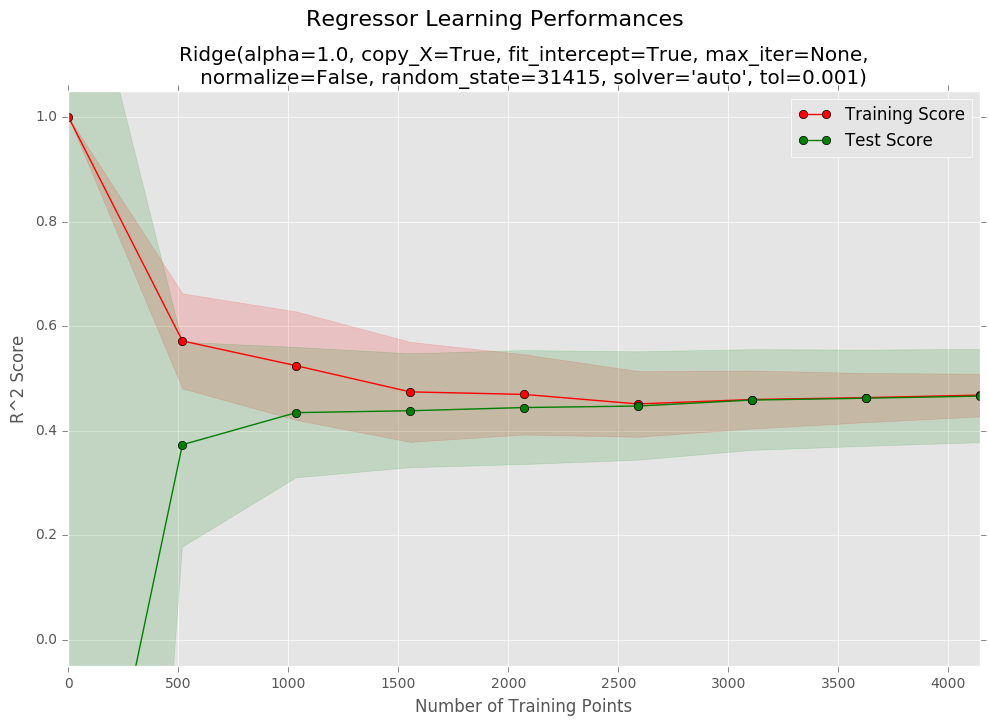

In [50]:
displayLearningCurve(X_train, y_train, reg, 20, 0.2, 31415)

Okay. It seems our algorithm is doing what it should do. Scores for training and testing are converging. It seems that we're good to go for some systematic implementation.

### Implementation
As mentioned before, there are several operations that might be useful or not depending on the regression model used. That's why we implemented some kind of a grid search for meta parameters. Before applying each of our four regression algorithms (Lasso, Eleastic Net, Ridge Regression and Support Vector Regressor) with their parameters, we can choose to vary several meta parameters for operations that may take effect after we removed the "Japanese only" sales giving us a dataset containing 6474 samples:

- `params_remove_bundles` can be True or False. If True, the samples containing games that were part of a console bundle will be considered to be outliers and be removed from the dataset. If False, the feature "Bundle" will be introduced and set to "bundle" for games that were part of a console bundle and to "unknown" for the rest because we didn't check all games as mentioned already.
- `params_outlier_threshold` is -1 or a positive float. If -1, none of the remaining samples will be treated as outliers. Otherwise, the float represents the factor to multiply the interquartile range with for defining an outlier threshold (cmp. k in [Tukey's range test](https://en.wikipedia.org/wiki/Tukey%27s_range_test), e.g. 1.5 as default for outliers). We will use [-1, 1.5, 1.7 and 2.0] for our initial grid search.
- `params_outlier_multiety` is a positive integer. It defines the number of features for one given sample that need to be considered as outliers for classifying the complete sample as an outlier that should be removed. So, if 1, the sample will be removed if there's at least one feature that contains an outlying value. If 2, the sample needs to have at least 2 features with outlying values to be removed, etc. We will use [1, 2, 3] for our initial grid search.
- `params_standardize_set` can be True or False. If True, all features will be scaled using a StandardScaler, so they have zero mean and unit variance.
- `params_scale_set_0_1` can be True or False. If True, all features will be scaled to range [0, 1].
- `params_boxcox_set` can be True or False. If True, the features "Critic Score" and "User Score" will be transformed to be as normal distribution-like as possible -- unless the data have been standardized which could lead to negative values preventing the BoxCox-transformation from working. We already discussed that only the skewness of "Critic Score" and "User Score" seems to be viable for this operation.

In order to improve our model and prevent overfitting, we also want to use some kind of cross validation. We use Scikit-Learn's "ShuffleSplit" because it's quite fast. It randomly splits our dataset into a training set and a test set. This allows us to train our model with the training set and then to compare the results with the predictions for the test set. This way we can detect overfitting. For ShuffleSplit, we cannot only define the fraction of samples that should be randomly assigned to the training set and the test set, but we can also define how often this procedure should be repeated. This way, we will be able to compute a mean R²-score instead of using one for just one arbitrary training set and test set. Our implementation also allows us to choose two "grid search" parameters for ShuffleSplit:

- `params_n_splits` contains the number of iterations or "splits" used for ShuffleSplit. We will use just [20] for our initial grid search.
- `params_test_size` contains the fraction that should be used as a test set. We will use just [0.2] for our initial grid search.

Also, we have one more parameter:

- `params_random_state` contains an integer that can be used to set a pseudo-random number generator state used for random sampling. It will be used by ShuffleSplit and some of our regression models. We will just use [31415] for our initial grid search.

We'll just quickly define a function that will initialize out set for the algorithms with the parameters given. It will perform what we did step by step above.

In [51]:
def prepare_sets(standardize_set, scale_set_0_1, boxcox_set, remove_bundles, outlier_threshold, outlier_multiety, n_splits, test_size, random_state):
       
    dataset = loadDataset()
    clean_dataset = sanitizeDatasets(raw_dataset)
    short_dataset = clean_dataset.copy()
    
    short_dataset = removeOutliersYear(short_dataset.copy())
    short_dataset = removeOutliersJapanOnly(short_dataset.copy())    
    short_dataset = removeOutliersBundle(short_dataset.copy(), remove_bundles)
   
    short_dataset = createFeaturePlatformManufacturer(short_dataset)
    short_dataset = createFeatureMobility(short_dataset)   
    short_dataset = short_dataset.drop(['Name', 'Publisher', 'Developer'], axis=1)
    short_dataset = convertNominalFeatures(short_dataset, ['Mobility', 'Platform', 'Genre', 'Rating', 'Platform_Manufacturer', 'Bundle'])
    short_dataset = dropNominalFeatures(short_dataset)
    
    if (standardize_set == True):
        short_dataset, std_scaler = standardizeDataFrame(short_dataset)
    if (scale_set_0_1 == True):
        short_dataset, minmax_scaler = scaleDataFrame(short_dataset)
    if (boxcox_set == True):
        short_dataset, boxcox_lmbdas = boxcoxDataFrame(short_dataset.copy(), columns=['Critic_Score', 'User_Score'])       

    if (outlier_threshold > 0):
        short_dataset = removeOutliers(short_dataset.copy(), columns = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count','Global_Sales'], threshold = outlier_threshold, multeity = outlier_multiety)            
        
    features, sales = separateTargetValues(short_dataset)
    
    return train_test_split(features, sales['Global'], test_size = test_size, random_state = random_state)

As mentioned in section "Algorithms and Techniques", we used Lasso, Eleastic Net, Ridge Regression and Support Vector Regressor. For each combination of the aforementioned meta paremeters, we ran a grid search for each algorithm that used some variations of the default values for alpha, C, etc. (see above). For each combination and algorithm we stored the grid search parameters, the R² value for the training sets and for the test sets and their absolute distance to each other -- we don't only want our R² value to be high, but we also want a small gap indicating absence of overfitting.

Since this may run quite a while and others might just want to have a look at the results, we'll store them in a separate file and then retrieve it.

In [68]:
"""
This is the part that also allows to do a grid search over
our meta paramaters such as fraction of test size or
the threshold for statistical outliers (if applied at all)
"""
params_standardize_set   = [False, True]
params_scale_set_0_1     = [False, True]
params_boxcox_set        = [False, True]
params_remove_bundles    = [False, True]
params_outlier_threshold = [-1, 1.5, 1.7, 2.0]
params_outlier_multiety  = [1, 2, 3]
params_n_splits          = [20]
params_test_size         = [0.2]
params_random_state      = [31415]

combinations = len(params_standardize_set) * len(params_scale_set_0_1) * len(params_boxcox_set) * len(params_remove_bundles) * len(params_outlier_threshold) * len(params_outlier_multiety) * len(params_n_splits) * len(params_test_size) * len(params_random_state)

results_columns = ['Id', 'Regressor', 'R2_Train', 'R2_Test', 'R2_Gap', 'Calc_Time', 'Standardized', 'Scaled_0_1', 'Boxcoxed', 'Remove_Bundles', 'Outlier_Threshold', 'Outlier_Multiety', 'Test_Size', 'N_Splits', 'RND']
results = pd.DataFrame(columns = results_columns)

rid = 1
best_r2 = (0, -1)
best_gap = (0, -1)

for standardize_set in params_standardize_set:
    for scale_set_0_1 in params_scale_set_0_1:
        for boxcox_set in params_boxcox_set:
            for remove_bundles in params_remove_bundles:
                for outlier_threshold in params_outlier_threshold:
                    for outlier_multiety in params_outlier_multiety:
                        for n_splits in params_n_splits:
                            for test_size in params_test_size:
                                for random_state in params_random_state:
                                    # boxcox does not work on values <= 0
                                    if (boxcox_set == True):
                                        standardize_set = False

                                    # Generate training and test sets
                                    X_train, X_test, y_train, y_test = prepare_sets(standardize_set, scale_set_0_1, boxcox_set, remove_bundles, outlier_threshold, outlier_multiety, n_splits, test_size, random_state)

                                    regressors = [0, 1, 2, 3]
                                    reg_params = [0, 1, 2, 3]

                                    # create a RidgeRegression regressor object
                                    regressor = Ridge(random_state = random_state)
                                    params = {'alpha': [0.3, 0.7, 1.0, 1.3, 1.7],    # positve float
                                              'fit_intercept': [True, False], # boolean
                                              'max_iter': [1000],             # integer
                                              'normalize': [True, False],     # boolean
                                              'solver': ['auto'] # {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'}
                                             }
                                    regressors[0] = regressor
                                    reg_params[0] = params

                                    # create a support vector regressor object
                                    regressor = svm.SVR()
                                    params = {'C': [0.7, 1.0, 1.3],
                                              'kernel': ['rbf'],
                                              'epsilon': [0.1, 0.3, 0.7, 1.0],
                                              'gamma': ['auto']
                                             }       
                                    regressors[1] = regressor
                                    reg_params[1] = params

                                    # create a ElasticNet regressor object
                                    regressor = ElasticNet()
                                    params = {'alpha': [0.3, 0.7, 1.0, 1.3, 1.7],
                                              'l1_ratio': [0, 0.3, 0.7, 1],
                                              'fit_intercept': [True, False],
                                              'normalize': [True, False],
                                              'max_iter' : [1000]
                                             }
                                    regressors[2] = regressor
                                    reg_params[2] = params

                                    # create a Lasso regressor object
                                    regressor = Lasso()
                                    params = {'alpha': [0.3, 0.7, 1.0, 1.3, 1.7],
                                              'fit_intercept': [True, False],
                                              'normalize': [True, False],
                                              'max_iter': [1000]
                                             }
                                    regressors[3] = regressor
                                    reg_params[3] = params

                                    total_start_time = time.time()
                                    display(time.localtime(total_start_time))

                                    for index in range(4):
                                        start_time = time.time()
                                        # Fit the training data to the model using grid search
                                        reg, reg_score_train, reg_score_test, reg_gap = getScores(X_train, y_train, X_test, y_test, regressors[index], reg_params[index], n_splits, test_size, random_state)
                                        end_time = time.time()

                                        print('ID: {} (of {})'.format(rid, combinations * 4))
                                        print('standardize_set={}, scale_set_0_1={}, boxcox_set={}'.format(standardize_set, scale_set_0_1, boxcox_set))
                                        print('remove_bundles={}, outlier_threshold={}, outlier_multiety={}'.format(remove_bundles, outlier_threshold, outlier_multiety))
                                        print('n_splits={}, test_size={}, random_state={}'.format(n_splits, test_size, random_state))
                                        print('X_train.shape={}'.format(X_train.shape))
                                        print('X_test.shape={}'.format(X_test.shape))
                                        print('Regressor: {}'.format(reg))
                                        print('R² score (train): {:.3f}'.format(reg_score_train))
                                        print('R² gap: {:.3f}'.format(reg_gap))
                                        print('==============================')

                                        if ((reg_score_train > best_r2[0]) | (best_r2[1] < 0)):
                                            best_r2 = (reg_score_train, rid)
                                        if ((reg_gap < best_gap[0]) | (best_gap[1] < 0)):
                                            best_gap = (reg_gap, rid)

                                        print('best r2: {} / best gap: {}'.format(best_r2, best_gap))
                                        print('==============================')

                                        #displayLearningCurve(X_train, y_train, reg, n_splits, test_size, random_state, params)

                                        result = pd.DataFrame(
                                            [[
                                                    rid,
                                                    reg,
                                                    reg_score_train,
                                                    reg_score_test,
                                                    reg_gap,
                                                    end_time - start_time,
                                                    standardize_set,
                                                    scale_set_0_1,
                                                    boxcox_set,
                                                    remove_bundles,
                                                    outlier_threshold,
                                                    outlier_multiety,
                                                    test_size,
                                                    n_splits,
                                                    random_state
                                                ]],
                                            columns = results_columns)
                                        results = results.append(result)
                                        rid = rid + 1
 
display(results)
print('BEST R²')
display(results.nlargest(1, 'R2_Train').head())
print('BEST GAP')
display(results.nsmallest(1, 'R2_Gap').head())

results.to_csv('results_large_grid.csv')

6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().
5267 samples remaining after removeOutliers().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=11, tm_hour=22, tm_min=19, tm_sec=9, tm_wday=5, tm_yday=70, tm_isdst=0)

ID: 1 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4213, 46)
X_test.shape=(1054, 46)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.290
R² gap: 0.074
best r2: (0.28990482907362625, 1) / best gap: (0.073576759512735013, 1)
ID: 2 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4213, 46)
X_test.shape=(1054, 46)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.754
R² gap: 0.692
best r2: (0.75397434304521771, 2) / best gap: (0.073576759512735013, 1)
ID: 3 (of

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=11, tm_hour=22, tm_min=30, tm_sec=31, tm_wday=5, tm_yday=70, tm_isdst=0)

ID: 5 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4960, 46)
X_test.shape=(1240, 46)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.509
R² gap: 0.014
best r2: (0.75397434304521771, 2) / best gap: (0.013891565287175167, 5)
ID: 6 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4960, 46)
X_test.shape=(1240, 46)
Regressor: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.294
R² gap: 0.239
best r2: (0.75397434304521771, 2) / best gap: (0.013891565287175167, 5)
ID: 7 (of

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=11, tm_hour=22, tm_min=46, tm_sec=55, tm_wday=5, tm_yday=70, tm_isdst=0)

ID: 9 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5160, 46)
X_test.shape=(1290, 46)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.467
R² gap: 0.056
best r2: (0.75397434304521771, 2) / best gap: (0.0038400716724028561, 7)
ID: 10 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5160, 46)
X_test.shape=(1290, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.216
R² gap: 0.143
best r2: (0.75397434304521771, 2) / best gap: (0.0038400716724028561, 7)
ID: 11 

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=11, tm_hour=23, tm_min=5, tm_sec=18, tm_wday=5, tm_yday=70, tm_isdst=0)

ID: 13 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4144, 44)
X_test.shape=(1036, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.290
R² gap: 0.029
best r2: (0.75397434304521771, 2) / best gap: (0.0038400716724028561, 7)
ID: 14 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4144, 44)
X_test.shape=(1036, 44)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.769
R² gap: 0.689
best r2: (0.76907012620098636, 14) / best gap: (0.0038400716724028561, 7)
ID: 15

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=11, tm_hour=23, tm_min=15, tm_sec=23, tm_wday=5, tm_yday=70, tm_isdst=0)

ID: 17 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4896, 44)
X_test.shape=(1224, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.218
R² gap: 0.019
best r2: (0.76907012620098636, 14) / best gap: (0.0038400716724028561, 7)
ID: 18 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4896, 44)
X_test.shape=(1224, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.704
R² gap: 0.552
best r2: (0.76907012620098636, 14) / best gap: (0.0038400716724028561, 7)
ID: 1

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=11, tm_hour=23, tm_min=30, tm_sec=53, tm_wday=5, tm_yday=70, tm_isdst=0)

ID: 21 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5044, 44)
X_test.shape=(1262, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.272
R² gap: 0.041
best r2: (0.76907012620098636, 14) / best gap: (0.0038400716724028561, 7)
ID: 22 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5044, 44)
X_test.shape=(1262, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.558
R² gap: 0.428
best r2: (0.76907012620098636, 14) / best gap: (0.0038400716724028561, 7)
ID: 2

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=11, tm_hour=23, tm_min=48, tm_sec=1, tm_wday=5, tm_yday=70, tm_isdst=0)

ID: 25 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4305, 46)
X_test.shape=(1077, 46)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.292
R² gap: 0.055
best r2: (0.76907012620098636, 14) / best gap: (0.0038400716724028561, 7)
ID: 26 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4305, 46)
X_test.shape=(1077, 46)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.850
R² gap: 0.848
best r2: (0.85014243667026901, 26) / best gap: (0.0038400716724028561, 7)
ID: 2

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=11, tm_hour=23, tm_min=58, tm_sec=1, tm_wday=5, tm_yday=70, tm_isdst=0)

ID: 29 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4978, 46)
X_test.shape=(1245, 46)
Regressor: Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.487
R² gap: 0.075
best r2: (0.85014243667026901, 26) / best gap: (0.0038400716724028561, 7)
ID: 30 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4978, 46)
X_test.shape=(1245, 46)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.244
R² gap: 0.243
best r2: (0.85014243667026901, 26) / best gap: (0.0038400716724028561, 7)
ID: 31

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=0, tm_min=12, tm_sec=53, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 33 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5162, 46)
X_test.shape=(1291, 46)
Regressor: Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.446
R² gap: 0.019
best r2: (0.85014243667026901, 26) / best gap: (0.0038400716724028561, 7)
ID: 34 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5162, 46)
X_test.shape=(1291, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.207
R² gap: 0.206
best r2: (0.85014243667026901, 26) / best gap: (0.0038400716724028561, 7)
ID: 35

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=0, tm_min=29, tm_sec=38, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 37 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4228, 44)
X_test.shape=(1058, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.303
R² gap: 0.088
best r2: (0.85014243667026901, 26) / best gap: (0.0038400716724028561, 7)
ID: 38 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4228, 44)
X_test.shape=(1058, 44)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.866
R² gap: 0.879
best r2: (0.86579858871084325, 38) / best gap: (0.0038400716724028561, 7)
ID: 39 

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=0, tm_min=38, tm_sec=53, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 41 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4908, 44)
X_test.shape=(1227, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.221
R² gap: 0.042
best r2: (0.86579858871084325, 38) / best gap: (0.0038400716724028561, 7)
ID: 42 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4908, 44)
X_test.shape=(1227, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.764
R² gap: 0.772
best r2: (0.86579858871084325, 38) / best gap: (0.0038400716724028561, 7)
ID: 43 

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=0, tm_min=52, tm_sec=50, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 45 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5046, 44)
X_test.shape=(1262, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.282
R² gap: 0.039
best r2: (0.86579858871084325, 38) / best gap: (0.0038400716724028561, 7)
ID: 46 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5046, 44)
X_test.shape=(1262, 44)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.390
R² gap: 0.386
best r2: (0.86579858871084325, 38) / best gap: (0.0038400716724028561, 7)
ID: 47 

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=8, tm_sec=15, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 49 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4213, 46)
X_test.shape=(1054, 46)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.274
R² gap: 0.056
best r2: (0.86579858871084325, 38) / best gap: (0.0038400716724028561, 7)
ID: 50 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4213, 46)
X_test.shape=(1054, 46)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.7, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -2.107
R² gap: 0.508
best r2: (0.86579858871084325, 38) / best gap: (0.0038400716724028561, 7)
ID: 5

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=12, tm_sec=37, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 53 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4960, 46)
X_test.shape=(1240, 46)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.508
R² gap: 0.012
best r2: (0.86579858871084325, 38) / best gap: (0.001615201570419611, 52)
ID: 54 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4960, 46)
X_test.shape=(1240, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -36.763
R² gap: 5.122
best r2: (0.86579858871084325, 38) / best gap: (0.001615201570419611, 52)
ID:

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=17, tm_sec=53, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 57 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5160, 46)
X_test.shape=(1290, 46)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.467
R² gap: 0.056
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 58 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5160, 46)
X_test.shape=(1290, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -2.737
R² gap: 2.367
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=23, tm_sec=16, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 61 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4143, 44)
X_test.shape=(1036, 44)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.271
R² gap: 0.007
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 62 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4143, 44)
X_test.shape=(1036, 44)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -1.956
R² gap: 0.487
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID:

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=27, tm_sec=24, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 65 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4894, 44)
X_test.shape=(1224, 44)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.216
R² gap: 0.030
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 66 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4894, 44)
X_test.shape=(1224, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -4.322
R² gap: 0.126
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=32, tm_sec=26, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 69 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5044, 44)
X_test.shape=(1262, 44)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.272
R² gap: 0.039
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 70 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5044, 44)
X_test.shape=(1262, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -1.545
R² gap: 0.265
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=37, tm_sec=43, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 73 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4305, 46)
X_test.shape=(1077, 46)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.276
R² gap: 0.043
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 74 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4305, 46)
X_test.shape=(1077, 46)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.7, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -2.165
R² gap: 0.446
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID:

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=42, tm_sec=9, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 77 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4978, 46)
X_test.shape=(1245, 46)
Regressor: Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.487
R² gap: 0.075
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 78 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4978, 46)
X_test.shape=(1245, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -33.926
R² gap: 13.799
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=47, tm_sec=22, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 81 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5162, 46)
X_test.shape=(1291, 46)
Regressor: Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.446
R² gap: 0.020
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 82 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5162, 46)
X_test.shape=(1291, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -1.480
R² gap: 1.567
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID:

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=52, tm_sec=44, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 85 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4228, 44)
X_test.shape=(1058, 44)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.287
R² gap: 0.066
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 86 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4228, 44)
X_test.shape=(1058, 44)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -2.004
R² gap: 0.441
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 8

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=1, tm_min=56, tm_sec=58, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 89 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4908, 44)
X_test.shape=(1227, 44)
Regressor: Ridge(alpha=1.3, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.221
R² gap: 0.043
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 90 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4908, 44)
X_test.shape=(1227, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -3.874
R² gap: 0.030
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=2, tm_min=2, tm_sec=2, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 93 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5046, 44)
X_test.shape=(1262, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.282
R² gap: 0.028
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 94 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5046, 44)
X_test.shape=(1262, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -1.308
R² gap: 0.261
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=2, tm_min=7, tm_sec=21, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 97 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4213, 46)
X_test.shape=(1054, 46)
Regressor: Ridge(alpha=1.3, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.290
R² gap: 0.071
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 98 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4213, 46)
X_test.shape=(1054, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.438
R² gap: 0.193
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=2, tm_min=13, tm_sec=45, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 101 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4960, 46)
X_test.shape=(1240, 46)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.510
R² gap: 0.020
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 102 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4960, 46)
X_test.shape=(1240, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.528
R² gap: 0.165
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=2, tm_min=22, tm_sec=32, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 105 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5160, 46)
X_test.shape=(1290, 46)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.475
R² gap: 0.103
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 106 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5160, 46)
X_test.shape=(1290, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.565
R² gap: 0.057
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=2, tm_min=32, tm_sec=20, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 109 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4144, 44)
X_test.shape=(1036, 44)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.290
R² gap: 0.028
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 110 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4144, 44)
X_test.shape=(1036, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.403
R² gap: 0.152
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=2, tm_min=39, tm_sec=41, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 113 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4895, 44)
X_test.shape=(1224, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.218
R² gap: 0.019
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 114 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4895, 44)
X_test.shape=(1224, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.335
R² gap: 0.051
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=2, tm_min=50, tm_sec=0, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 117 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5044, 44)
X_test.shape=(1261, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.264
R² gap: 0.008
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 118 (of 192)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5044, 44)
X_test.shape=(1261, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.441
R² gap: 0.122
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=3, tm_min=1, tm_sec=7, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 121 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4305, 46)
X_test.shape=(1077, 46)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.292
R² gap: 0.055
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 122 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4305, 46)
X_test.shape=(1077, 46)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.850
R² gap: 0.848
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=3, tm_min=11, tm_sec=8, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 125 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4978, 46)
X_test.shape=(1245, 46)
Regressor: Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.487
R² gap: 0.075
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 126 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4978, 46)
X_test.shape=(1245, 46)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.244
R² gap: 0.243
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=3, tm_min=26, tm_sec=0, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 129 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5162, 46)
X_test.shape=(1291, 46)
Regressor: Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.446
R² gap: 0.019
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 130 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5162, 46)
X_test.shape=(1291, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.207
R² gap: 0.206
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=3, tm_min=42, tm_sec=44, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 133 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4228, 44)
X_test.shape=(1058, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.303
R² gap: 0.088
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 134 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4228, 44)
X_test.shape=(1058, 44)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.866
R² gap: 0.879
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=3, tm_min=52, tm_sec=0, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 137 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4908, 44)
X_test.shape=(1227, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.221
R² gap: 0.042
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 138 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4908, 44)
X_test.shape=(1227, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.764
R² gap: 0.772
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=4, tm_min=5, tm_sec=55, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 141 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5046, 44)
X_test.shape=(1262, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.282
R² gap: 0.039
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 142 (of 192)
standardize_set=False, scale_set_0_1=False, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5046, 44)
X_test.shape=(1262, 44)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.390
R² gap: 0.386
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=4, tm_min=21, tm_sec=18, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 145 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4213, 46)
X_test.shape=(1054, 46)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.274
R² gap: 0.056
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 146 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4213, 46)
X_test.shape=(1054, 46)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.7, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -2.107
R² gap: 0.508
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=4, tm_min=25, tm_sec=38, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 149 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4960, 46)
X_test.shape=(1240, 46)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.508
R² gap: 0.012
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 150 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4960, 46)
X_test.shape=(1240, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -36.763
R² gap: 5.122
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 5

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=4, tm_min=30, tm_sec=54, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 153 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5160, 46)
X_test.shape=(1290, 46)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.467
R² gap: 0.056
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 154 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5160, 46)
X_test.shape=(1290, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -2.737
R² gap: 2.367
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=4, tm_min=36, tm_sec=16, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 157 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4143, 44)
X_test.shape=(1036, 44)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.271
R² gap: 0.007
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 158 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4143, 44)
X_test.shape=(1036, 44)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -1.956
R² gap: 0.487
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=4, tm_min=40, tm_sec=24, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 161 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4894, 44)
X_test.shape=(1224, 44)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.216
R² gap: 0.030
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 162 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4894, 44)
X_test.shape=(1224, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -4.322
R² gap: 0.126
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=4, tm_min=45, tm_sec=26, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 165 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5044, 44)
X_test.shape=(1262, 44)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.272
R² gap: 0.039
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 166 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=False
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5044, 44)
X_test.shape=(1262, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -1.545
R² gap: 0.265
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=4, tm_min=50, tm_sec=43, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 169 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4305, 46)
X_test.shape=(1077, 46)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.276
R² gap: 0.043
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 170 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4305, 46)
X_test.shape=(1077, 46)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.7, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -2.165
R² gap: 0.446
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=4, tm_min=55, tm_sec=9, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 173 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4978, 46)
X_test.shape=(1245, 46)
Regressor: Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.487
R² gap: 0.075
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 174 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4978, 46)
X_test.shape=(1245, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -33.926
R² gap: 13.799
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=5, tm_min=0, tm_sec=23, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 177 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5162, 46)
X_test.shape=(1291, 46)
Regressor: Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.446
R² gap: 0.020
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 178 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=False, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5162, 46)
X_test.shape=(1291, 46)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -1.480
R² gap: 1.567
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
I

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=5, tm_min=5, tm_sec=45, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 181 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4228, 44)
X_test.shape=(1058, 44)
Regressor: Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.287
R² gap: 0.066
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 182 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4228, 44)
X_test.shape=(1058, 44)
Regressor: SVR(C=0.7, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -2.004
R² gap: 0.441
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID:

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=5, tm_min=9, tm_sec=57, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 185 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4908, 44)
X_test.shape=(1227, 44)
Regressor: Ridge(alpha=1.3, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.221
R² gap: 0.043
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 186 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=2
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(4908, 44)
X_test.shape=(1227, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -3.874
R² gap: 0.030
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID

time.struct_time(tm_year=2017, tm_mon=3, tm_mday=12, tm_hour=5, tm_min=15, tm_sec=1, tm_wday=6, tm_yday=71, tm_isdst=0)

ID: 189 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5046, 44)
X_test.shape=(1262, 44)
Regressor: Ridge(alpha=1.7, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, random_state=31415, solver='auto', tol=0.001)
R² score (train): 0.282
R² gap: 0.028
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID: 190 (of 192)
standardize_set=False, scale_set_0_1=True, boxcox_set=True
remove_bundles=True, outlier_threshold=2.0, outlier_multiety=3
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5046, 44)
X_test.shape=(1262, 44)
Regressor: SVR(C=1.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): -1.308
R² gap: 0.261
best r2: (0.86579858871084325, 38) / best gap: (1.2257262693715631e-07, 56)
ID

,Id,Regressor,R2_Train,R2_Test,R2_Gap,Calc_Time,Standardized,Scaled_0_1,Boxcoxed,Remove_Bundles,Outlier_Threshold,Outlier_Multiety,Test_Size,N_Splits,RND
0,1.0,"Ridge(alpha=1.7, copy_X=True, fit_intercept=Tr...",0.289905,0.216328,0.073577,19.042261,False,False,False,False,2.0,1.0,0.2,20.0,31415.0
0,2.0,"SVR(C=0.7, cache_size=200, coef0=0.0, degree=3...",0.753974,0.062438,0.691537,358.244049,False,False,False,False,2.0,1.0,0.2,20.0,31415.0
0,3.0,"ElasticNet(alpha=0.3, copy_X=True, fit_interce...",0.222940,0.150160,0.072780,284.128131,False,False,False,False,2.0,1.0,0.2,20.0,31415.0
0,4.0,"Lasso(alpha=0.3, copy_X=True, fit_intercept=Tr...",0.140419,0.084512,0.055907,16.254095,False,False,False,False,2.0,1.0,0.2,20.0,31415.0
0,5.0,"Ridge(alpha=1.7, copy_X=True, fit_intercept=Tr...",0.508952,0.495060,0.013892,21.913103,False,False,False,False,2.0,2.0,0.2,20.0,31415.0
0,6.0,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.293520,0.054770,0.238750,586.595622,False,False,False,False,2.0,2.0,0.2,20.0,31415.0
0,7.0,"ElasticNet(alpha=0.3, copy_X=True, fit_interce...",0.124306,0.120466,0.003840,350.183026,False,False,False,False,2.0,2.0,0.2,20.0,31415.0
0,8.0,"Lasso(alpha=0.3, copy_X=True, fit_intercept=Fa...",0.059964,0.064445,0.004481,21.945810,False,False,False,False,2.0,2.0,0.2,20.0,31415.0
0,9.0,"Ridge(alpha=0.3, copy_X=True, fit_intercept=Tr...",0.466998,0.411143,0.055855,21.966072,False,False,False,False,2.0,3.0,0.2,20.0,31415.0
0,10.0,"SVR(C=1.3, cache_size=200, coef0=0.0, degree=3...",0.215841,0.073045,0.142796,698.596618,False,False,False,False,2.0,3.0,0.2,20.0,31415.0


BEST R²


,Id,Regressor,R2_Train,R2_Test,R2_Gap,Calc_Time,Standardized,Scaled_0_1,Boxcoxed,Remove_Bundles,Outlier_Threshold,Outlier_Multiety,Test_Size,N_Splits,RND
0,38.0,"SVR(C=0.7, cache_size=200, coef0=0.0, degree=3...",0.865799,-0.013438,0.879237,250.372142,False,False,True,True,2.0,1.0,0.2,20.0,31415.0
0,134.0,"SVR(C=0.7, cache_size=200, coef0=0.0, degree=3...",0.865799,-0.013438,0.879237,250.687234,False,False,True,True,2.0,1.0,0.2,20.0,31415.0
0,26.0,"SVR(C=0.7, cache_size=200, coef0=0.0, degree=3...",0.850142,0.001671,0.848471,278.857191,False,False,True,False,2.0,1.0,0.2,20.0,31415.0
0,122.0,"SVR(C=0.7, cache_size=200, coef0=0.0, degree=3...",0.850142,0.001671,0.848471,279.524936,False,False,True,False,2.0,1.0,0.2,20.0,31415.0
0,14.0,"SVR(C=0.7, cache_size=200, coef0=0.0, degree=3...",0.769070,0.080400,0.688670,302.697336,False,False,False,True,2.0,1.0,0.2,20.0,31415.0


BEST GAP


,Id,Regressor,R2_Train,R2_Test,R2_Gap,Calc_Time,Standardized,Scaled_0_1,Boxcoxed,Remove_Bundles,Outlier_Threshold,Outlier_Multiety,Test_Size,N_Splits,RND
0,56.0,"Lasso(alpha=0.3, copy_X=True, fit_intercept=Tr...",0.0,-1.225726e-07,1.225726e-07,4.535819,False,True,False,False,2.0,2.0,0.2,20.0,31415.0
0,152.0,"Lasso(alpha=0.3, copy_X=True, fit_intercept=Tr...",0.0,-1.225726e-07,1.225726e-07,4.476567,False,True,False,False,2.0,2.0,0.2,20.0,31415.0
0,104.0,"Lasso(alpha=0.3, copy_X=True, fit_intercept=Tr...",0.0,-1.225726e-07,1.225726e-07,4.464771,True,False,False,False,2.0,2.0,0.2,20.0,31415.0
0,72.0,"Lasso(alpha=0.3, copy_X=True, fit_intercept=Tr...",0.0,-3.074377e-06,3.074377e-06,4.495518,False,True,False,True,2.0,3.0,0.2,20.0,31415.0
0,168.0,"Lasso(alpha=0.3, copy_X=True, fit_intercept=Tr...",0.0,-3.074377e-06,3.074377e-06,4.485322,False,True,False,True,2.0,3.0,0.2,20.0,31415.0


The highest reported R² value for training sets was a magnificent 0.89, but it was accompanied by an R² value for the test sets of -0.02. This result clearly suffered from overfitting and cannot be used. We decided to go for a maximum threshold of 0.05 for the gap between the R² values and had a look at the best remaining results:

In [52]:
results = pd.read_csv("results_large_grid.csv")

display(results[(results['R2_Gap'] <= 0.05) & (results['R2_Train'] > 0.4)].sort_values(['R2_Train'], ascending=False).head())

,Unnamed: 0,Id,Regressor,R2_Train,R2_Test,R2_Gap,Calc_Time,Standardized,Scaled_0_1,Boxcoxed,Remove_Bundles,Outlier_Threshold,Outlier_Multiety,Test_Size,N_Splits,RND
97,0,98,"SVR(C=1.3, cache_size=200, coef0=0.0, degree=3...",0.553025,0.574882,0.021857,269.617612,True,False,False,False,-1.0,1.0,0.2,20.0,31415.0
105,0,106,"SVR(C=1.3, cache_size=200, coef0=0.0, degree=3...",0.553025,0.574882,0.021857,269.300360,True,False,False,False,-1.0,3.0,0.2,20.0,31415.0
101,0,102,"SVR(C=1.3, cache_size=200, coef0=0.0, degree=3...",0.553025,0.574882,0.021857,269.767108,True,False,False,False,-1.0,2.0,0.2,20.0,31415.0
292,0,293,"Ridge(alpha=1.7, copy_X=True, fit_intercept=Tr...",0.521574,0.528186,0.006612,8.930969,True,False,False,False,1.5,2.0,0.2,20.0,31415.0
460,0,461,"Ridge(alpha=1.7, copy_X=True, fit_intercept=Fa...",0.511256,0.552329,0.041073,9.195578,False,True,True,False,1.7,2.0,0.2,20.0,31415.0


The best three results were achieved by a Support Vector Regressor (R² = 0.553, gap = 0.022) and by two different Ridge Regressors (R² = 0.522, gap = 0.006 and R² = 0.511, gap = 0.041). All of them (and most of the top models) used the additional feature that flags game bundles. It seems that this variable is very useful for regression. We decided to use the SVR, not only because it had the higher R² score, but because it didn't rely on removing statistical outliers in contrast to the Ridge Regressors. As already stated, we considered all the samples to be carriers of relevant information. Furthermore, the next best solutions do not show a clear pattern concerning the meta parameters. This might be a sign for them rather optimizing the data to fit the model instead vice versa.

### Refinement
Our best initial solution was obtained for a preprocessed dataset that has additionally been standardized with "StandardScaler". The parameters for the Support Vector Regressor that had been set during the grid search were C, epsilon, gamma and kernel, and the R² score of 0.55 with a gap of 0.022 was achieved with C=1.3, epsilon=0.1, gamma='auto' and kernel='rbf'.

We decided to try to improve the R² score and the gap while setting a maximum gap at 0.010. This should be a very decent indicator for hardly showing any traces of overfitting. By iteratively tweaking C and epsilon manually, we finally got an R² score of 0.591 with a gap of 0.010 when using C = 1.74, epsilon = 0.12 (and still gammma='auto' and kernel='rbf').

|  C  | EPSILON | GAMMA | KERNEL | R² (TRAIN) | R² GAP |
|-----|---------|-------|--------|------------|--------|
| 1.30|    0.10 |  auto |    rbf |      0.553 |  0.022 |
| 1.70|    0.10 |  auto |    rbf |      0.587 |  0.008 |
| 1.80|    0.10 |  auto |    rbf |      0.594 |  0.015 |
| 1.73|    0.11 |  auto |    rbf |      0.590 |  0.010 |
| 1.74|    0.12 |  auto |    rbf |      0.591 |  0.010 |
| 1.75|    0.13 |  auto |    rbf |      0.592 |  0.011 |
| 1.74|    0.14 |  auto |    rbf |      0.591 |  0.010 |
| 1.74|    0.15 |  auto |    rbf |      0.592 |  0.011 |
| 1.74|    0.10 |  auto |    rbf |      0.590 |  0.010 |

Table: Intermediary results

In [53]:
# Tweak SVR results
# C = 1.3; epsilon = 0.1; gamma = auto from previous analysis => R² = 0.553, gap = 0.022
# C = 1.7; epsilon = 0.1; gamma = auto; R² score (train): 0.587, R² gap: 0.008
# C = 1.8; epsilon = 0.1; gamma = auto; R² score (train): 0.594; R² gap: 0.015
# C = 1.73; epsilon = 0.11; gamma = auto; R² score (train): 0.590; R² gap: 0.010
#    C = 1.74; epsilon = 0.12; gamma = auto; R² score (train): 0.591; R² gap: 0.010
# C = 1.75; epsilon = 0.13; gamma = auto; R² score (train): 0.592; R² gap: 0.011
# C = 1.74; epsilon = 0.14; gamma = auto; R² score (train): 0.591; R² gap: 0.010
# C = 1.74; epsilon = 0.15; gamma = auto; R² score (train): 0.592; R² gap: 0.011
# C = 1.74; epsilon = 0.10; gamma = auto; R² score (train): 0.590; R² gap: 0.010

# C: penalty; the higher, the more overfitting
# "Let us suppose that the output values are in the range [0, B]. [...] a value of C about equal to B can be considered to be a robust choice."
# Mattera and Haykin (1999), pages 226-227 in Advances in Kernel Methods

# epsilon: support vectors; the lower, the more overfitting
# "A robust compromise can be to impose the condition that the percentage of Support Vectors be equal to 50%. A larger value of ε can be utilized (especially for very large and/or noisy training sets)..."
# Mattera and Haykin (1999)

# gamma: sphere of influence; the higher, the more overfitting
# Gamma is a parameter for the kernel function. Its default value is setup as gamma = 1 / number of features.

standardize_set   = True
scale_set_0_1     = False
boxcox_set        = False
remove_bundles    = False
outlier_threshold = -1
outlier_multiety  = 1
n_splits          = 20
test_size         = 0.2
random_state      = 31415

X_train, X_test, y_train, y_test = prepare_sets(standardize_set, scale_set_0_1, boxcox_set, remove_bundles, outlier_threshold, outlier_multiety, n_splits, test_size, random_state)

# create a support vector regressor object
regressor = svm.SVR()
params = {'C': [1.74],
          'kernel': ['rbf'],
          'epsilon': [0.12],
          'gamma': ['auto']
         }       

# Fit the training data to the model using grid search
reg, reg_score_train, reg_score_test, reg_gap = getScores(X_train, y_train, X_test, y_test, regressor, params, n_splits, test_size, random_state)

print('standardize_set={}, scale_set_0_1={}, boxcox_set={}'.format(standardize_set, scale_set_0_1, boxcox_set))
print('remove_bundles={}, outlier_threshold={}, outlier_multiety={}'.format(remove_bundles, outlier_threshold, outlier_multiety))
print('n_splits={}, test_size={}, random_state={}'.format(n_splits, test_size, random_state))
print('X_train.shape={}'.format(X_train.shape))
print('X_test.shape={}'.format(X_test.shape))
print('Regressor: {}'.format(reg))
print('R² score (train): {:.3f}'.format(reg_score_train))
print('R² gap: {:.3f}'.format(reg_gap))

#displayLearningCurve(X_train, y_train, reg, n_splits, test_size, random_state, params)

6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5179, 46)
X_test.shape=(1295, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.591
R² gap: 0.010


## IV. Results

### Model Evaluation and Validation
The final model is a Support Vector Regressor using the following parameters next to default values:

- `C`: 1.74
- `epsilon`: 0.12
- `gamma`: 'auto' (1/number of features by default)
- `kernel`: 'rbf'

The model was chosen because it returned one of the highest R² values while still not overfitting to the training data. It was also chosen because it doesn't require to remove outliers for purely statistical reasons. Thus, it may preserve relevant information that would be lost otherwise.

We tested the model for sensitivtiy issues with some varying meta parameters (and stored the results):

- `params_n_splits` in [20, 25, 30, 100]
- `params_test_size` in [0.2, 0.25, 0.3, 0.5]
- `params_random_state` in [31415, 42, 123]

In [54]:
# SVR with best results, when standardized and no bundles / statistical outliers removed

"""
This is the program that also allows to to a grid search over
some of my meta paramaters such as fraction of test size or
the threshold for statistical outliers (if applied at all)
"""
params_standardize_set   = [True]
params_scale_set_0_1     = [False]
params_boxcox_set        = [False]
params_remove_bundles    = [False]
params_outlier_threshold = [-1]
params_outlier_multiety  = [1]
params_n_splits          = [20, 25, 30, 100]
params_test_size         = [0.2, 0.25, 0.3, 0.5]
params_random_state      = [31415, 42, 123]

combinations = len(params_standardize_set) * len(params_scale_set_0_1) * len(params_boxcox_set) * len(params_remove_bundles) * len(params_outlier_threshold) * len(params_outlier_multiety) * len(params_n_splits) * len(params_test_size) * len(params_random_state)

results_columns = ['Id', 'Regressor', 'R2_Train', 'R2_Test', 'R2_Gap', 'Calc_Time', 'Standardized', 'Scaled_0_1', 'Boxcoxed', 'Remove_Bundles', 'Outlier_Threshold', 'Outlier_Multiety', 'Test_Size', 'N_Splits', 'RND']
results = pd.DataFrame(columns = results_columns)

rid = 1
best_r2 = (0, -1)
best_gap = (0, -1)

for standardize_set in params_standardize_set:
    for scale_set_0_1 in params_scale_set_0_1:
        for boxcox_set in params_boxcox_set:
            for remove_bundles in params_remove_bundles:
                for outlier_threshold in params_outlier_threshold:
                    for outlier_multiety in params_outlier_multiety:
                        for n_splits in params_n_splits:
                            for test_size in params_test_size:
                                for random_state in params_random_state:
                                    # boxcox does not work on values <= 0
                                    if (boxcox_set == True):
                                        standardize_set = False

                                    # Generate training and test sets
                                    X_train, X_test, y_train, y_test = prepare_sets(standardize_set, scale_set_0_1, boxcox_set, remove_bundles, outlier_threshold, outlier_multiety, n_splits, test_size, random_state)

                                    regressors = [0, 1, 2, 3, 4, 5]
                                    reg_params = [0, 1, 2, 3, 4, 5]

                                    # create a support vector regressor object
                                    regressor = svm.SVR()
                                    params = {'C': [1.74],
                                      'kernel': ['rbf'],
                                      'epsilon': [0.12],
                                      'gamma': ['auto']
                                     }        
                                    regressors[0] = regressor
                                    reg_params[0] = params

                                    total_start_time = time.time()
                                    display(time.localtime(total_start_time))

                                    for index in range(1):
                                        start_time = time.time()
                                        # Fit the training data to the model using grid search
                                        reg, reg_score_train, reg_score_test, reg_gap = getScores(X_train, y_train, X_test, y_test, regressors[index], reg_params[index], n_splits, test_size, random_state)
                                        end_time = time.time()

                                        print('ID: {} (of {})'.format(rid, combinations))
                                        print('standardize_set={}, scale_set_0_1={}, boxcox_set={}'.format(standardize_set, scale_set_0_1, boxcox_set))
                                        print('remove_bundles={}, outlier_threshold={}, outlier_multiety={}'.format(remove_bundles, outlier_threshold, outlier_multiety))
                                        print('n_splits={}, test_size={}, random_state={}'.format(n_splits, test_size, random_state))
                                        print('X_train.shape={}'.format(X_train.shape))
                                        print('X_test.shape={}'.format(X_test.shape))
                                        print('Regressor: {}'.format(reg))
                                        print('R² score (train): {:.3f}'.format(reg_score_train))
                                        print('R² gap: {:.3f}'.format(reg_gap))
                                        print('==============================')

                                        if ((reg_score_train > best_r2[0]) | (best_r2[1] < 0)):
                                            best_r2 = (reg_score_train, rid)
                                        if ((reg_gap < best_gap[0]) | (best_gap[1] < 0)):
                                            best_gap = (reg_gap, rid)

                                        print('best r2: {} / best gap: {}'.format(best_r2, best_gap))
                                        print('==============================')

                                        #displayLearningCurve(X_train, y_train, reg, n_splits, test_size, random_state, params)

                                        result = pd.DataFrame(
                                            [[
                                                    rid,
                                                    reg,
                                                    reg_score_train,
                                                    reg_score_test,
                                                    reg_gap,
                                                    end_time - start_time,
                                                    standardize_set,
                                                    scale_set_0_1,
                                                    boxcox_set,
                                                    remove_bundles,
                                                    outlier_threshold,
                                                    outlier_multiety,
                                                    test_size,
                                                    n_splits,
                                                    random_state
                                                ]],
                                            columns = results_columns)
                                        results = results.append(result)
                                        rid = rid + 1
 
display(results)
print('BEST R²')
display(results.nlargest(1, 'R2_Train').head())
print('BEST GAP')
display(results.nsmallest(1, 'R2_Gap').head())

results.to_csv('results_svr_sensitivity.csv')

6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=10, tm_sec=15, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 1 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=31415
X_train.shape=(5179, 46)
X_test.shape=(1295, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.591
R² gap: 0.010
best r2: (0.59058727268750077, 1) / best gap: (0.010256867359389243, 1)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=10, tm_sec=49, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 2 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=42
X_train.shape=(5179, 46)
X_test.shape=(1295, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.613
R² gap: 0.038
best r2: (0.61332665995133284, 2) / best gap: (0.010256867359389243, 1)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=11, tm_sec=22, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 3 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.2, random_state=123
X_train.shape=(5179, 46)
X_test.shape=(1295, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.562
R² gap: 0.001
best r2: (0.61332665995133284, 2) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=11, tm_sec=55, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 4 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.25, random_state=31415
X_train.shape=(4855, 46)
X_test.shape=(1619, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.588
R² gap: 0.019
best r2: (0.61332665995133284, 2) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=12, tm_sec=22, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 5 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.25, random_state=42
X_train.shape=(4855, 46)
X_test.shape=(1619, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.615
R² gap: 0.051
best r2: (0.61473041839496334, 5) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=12, tm_sec=50, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 6 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.25, random_state=123
X_train.shape=(4855, 46)
X_test.shape=(1619, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.565
R² gap: 0.022
best r2: (0.61473041839496334, 5) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=13, tm_sec=17, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 7 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.3, random_state=31415
X_train.shape=(4531, 46)
X_test.shape=(1943, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.572
R² gap: 0.013
best r2: (0.61473041839496334, 5) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=13, tm_sec=39, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 8 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.3, random_state=42
X_train.shape=(4531, 46)
X_test.shape=(1943, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.609
R² gap: 0.042
best r2: (0.61473041839496334, 5) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=14, tm_sec=1, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 9 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.3, random_state=123
X_train.shape=(4531, 46)
X_test.shape=(1943, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.558
R² gap: 0.024
best r2: (0.61473041839496334, 5) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=14, tm_sec=24, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 10 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.5, random_state=31415
X_train.shape=(3237, 46)
X_test.shape=(3237, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.553
R² gap: 0.002
best r2: (0.61473041839496334, 5) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=14, tm_sec=34, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 11 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.5, random_state=42
X_train.shape=(3237, 46)
X_test.shape=(3237, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.617
R² gap: 0.059
best r2: (0.6168421499162855, 11) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=14, tm_sec=44, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 12 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=20, test_size=0.5, random_state=123
X_train.shape=(3237, 46)
X_test.shape=(3237, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.514
R² gap: 0.066
best r2: (0.6168421499162855, 11) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=14, tm_sec=54, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 13 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=25, test_size=0.2, random_state=31415
X_train.shape=(5179, 46)
X_test.shape=(1295, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.591
R² gap: 0.010
best r2: (0.6168421499162855, 11) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=15, tm_sec=34, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 14 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=25, test_size=0.2, random_state=42
X_train.shape=(5179, 46)
X_test.shape=(1295, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.613
R² gap: 0.038
best r2: (0.6168421499162855, 11) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=16, tm_sec=14, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 15 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=25, test_size=0.2, random_state=123
X_train.shape=(5179, 46)
X_test.shape=(1295, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.562
R² gap: 0.001
best r2: (0.6168421499162855, 11) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=16, tm_sec=55, tm_wday=3, tm_yday=75, tm_isdst=0)

ID: 16 (of 48)
standardize_set=True, scale_set_0_1=False, boxcox_set=False
remove_bundles=False, outlier_threshold=-1, outlier_multiety=1
n_splits=25, test_size=0.25, random_state=31415
X_train.shape=(4855, 46)
X_test.shape=(1619, 46)
Regressor: SVR(C=1.74, cache_size=200, coef0=0.0, degree=3, epsilon=0.12, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R² score (train): 0.588
R² gap: 0.019
best r2: (0.6168421499162855, 11) / best gap: (0.0013451645811726198, 3)
6547 samples remaining after removeOutliersYear().
6474 samples remaining after removeOutliersJapanOnly().
6474 samples remaining after removeOutliersBundle().


time.struct_time(tm_year=2017, tm_mon=3, tm_mday=16, tm_hour=15, tm_min=17, tm_sec=28, tm_wday=3, tm_yday=75, tm_isdst=0)

KeyboardInterrupt: 

In [55]:
sensitivity = pd.read_csv('results_svr_sensitivity.csv')

display(sensitivity.describe())
display(sensitivity.sort_values(['N_Splits', 'R2_Train'], ascending=False))

,Unnamed: 0,Id,R2_Train,R2_Test,R2_Gap,Calc_Time,Outlier_Threshold,Outlier_Multiety,Test_Size,N_Splits,RND
count,48.0,48.00,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.000000,48.000000,48.000000
mean,0.0,24.50,0.579674,0.569591,0.028986,41.791854,-1.0,1.0,0.312500,43.750000,10526.666667
std,0.0,14.00,0.030379,0.010872,0.021086,37.579073,0.0,0.0,0.115086,33.013537,14926.623191
min,0.0,1.00,0.514449,0.551028,0.001345,6.951000,-1.0,1.0,0.200000,20.000000,42.000000
25%,0.0,12.75,0.560689,0.561945,0.012575,22.523000,-1.0,1.0,0.237500,23.750000,42.000000
50%,0.0,24.50,0.580026,0.567960,0.023161,29.806500,-1.0,1.0,0.275000,27.500000,123.000000
75%,0.0,36.25,0.610087,0.580235,0.043989,38.343500,-1.0,1.0,0.350000,47.500000,31415.000000
max,0.0,48.00,0.616842,0.586883,0.065755,141.924000,-1.0,1.0,0.500000,100.000000,31415.000000


,Unnamed: 0,Id,Regressor,R2_Train,R2_Test,R2_Gap,Calc_Time,Standardized,Scaled_0_1,Boxcoxed,Remove_Bundles,Outlier_Threshold,Outlier_Multiety,Test_Size,N_Splits,RND
46,0,47.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.616842,0.558333,0.058510,30.419,True,False,False,False,-1.0,1.0,0.50,100.0,42.0
40,0,41.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.614730,0.563336,0.051394,110.948,True,False,False,False,-1.0,1.0,0.25,100.0,42.0
37,0,38.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.613327,0.575206,0.038121,140.326,True,False,False,False,-1.0,1.0,0.20,100.0,42.0
43,0,44.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.609008,0.567487,0.041521,88.590,True,False,False,False,-1.0,1.0,0.30,100.0,42.0
36,0,37.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.590587,0.580330,0.010257,141.924,True,False,False,False,-1.0,1.0,0.20,100.0,31415.0
39,0,40.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.587867,0.568433,0.019433,112.461,True,False,False,False,-1.0,1.0,0.25,100.0,31415.0
42,0,43.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.572186,0.558839,0.013347,89.735,True,False,False,False,-1.0,1.0,0.30,100.0,31415.0
41,0,42.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.564745,0.586883,0.022138,112.089,True,False,False,False,-1.0,1.0,0.25,100.0,123.0
38,0,39.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.561636,0.562981,0.001345,140.674,True,False,False,False,-1.0,1.0,0.20,100.0,123.0
44,0,45.0,"SVR(C=1.74, cache_size=200, coef0=0.0, degree=...",0.557849,0.582033,0.024184,89.043,True,False,False,False,-1.0,1.0,0.30,100.0,123.0


We can see that even varying those can have a large influence. The R² score ranges from 0.51 to 0.61. This seems to be a rather significant difference in my opinion. Luckily, the gap ranges from 0.001 to 0.06 only, and this result is still pretty good. On the other hand, we have reason to believe that while the results are not completely arbitrary, they are not stable either. For example, when sorting the data by the R² score, they are virtually also sorted by random_state. All top scores result from random_state = 42, then nearly all the next best scores result from random_state = 31415, and finally 123 kicks in. In consequence, the results seem to be quite dependant on the random sampling within the cross validation. We might also be able to find values for "random_state" that will give us even worse results.

Unfortunately, we still cannot trust our model. Even our best R² value is still too low. We cannot predict much more than half of the variance within the global sales. Also, we'd have to investigate the robustness concerning the random sampling and possible trade some portion of our R² score in order to reduce variance and overfitting.

This might in fact be a good idea as we can conclude from checking the performance for completely new data. Those must be scaled (standardized) using Scikit-Learn's "StandardScaler" that was obtained from the training data, but then we're good to go. For our sensitivity analysis, we can use the samples from 2016 that had been removed because we didn't have data for the complete year and because the dataset was probably lacking sales information from the Holiday Season. This restriction might influence the reliability of our sensitivity analysis a little bit, but it should still give us some insight about the reliability of our model.

In [56]:
# test with unknown data

dataset = loadDataset()
clean_dataset = sanitizeDatasets(raw_dataset)
short_dataset = clean_dataset.copy()
    
short_dataset = short_dataset[(short_dataset.Year_of_Release > 2000) & (short_dataset.Year_of_Release < 2017)]
short_dataset = removeOutliersJapanOnly(short_dataset.copy())
short_dataset = removeOutliersBundle(short_dataset.copy(), False)
   
short_dataset = createFeaturePlatformManufacturer(short_dataset)
short_dataset = createFeatureMobility(short_dataset)   
short_dataset = short_dataset.drop(['Name', 'Publisher', 'Developer'], axis=1)
short_dataset = convertNominalFeatures(short_dataset, ['Mobility', 'Platform', 'Genre', 'Rating', 'Platform_Manufacturer', 'Bundle'])
short_dataset = dropNominalFeatures(short_dataset)

unknown_dataset = short_dataset[short_dataset['Year_of_Release'] == 2016].copy()
short_dataset = removeOutliersYear(short_dataset.copy())

short_dataset, std_scaler = standardizeDataFrame(short_dataset)

features, sales = separateTargetValues(short_dataset)
    
X_train, X_test, y_train, y_test = train_test_split(features, sales['Global'], test_size = 0.2, random_state = 31415)

regressor = svm.SVR()

params = {'C': [1.74], 'kernel': ['rbf'], 'epsilon': [0.12], 'gamma': ['auto']}        
reg, reg_score_train, reg_score_test, reg_gap = getScores(X_train, y_train, X_test, y_test, regressor, params, 20, 0.2, 31415)

display(unknown_dataset.head())

scaled_data = std_scaler.transform(unknown_dataset.copy())
test_dataset = pd.DataFrame(data = scaled_data, index = unknown_dataset.index, columns = unknown_dataset.keys())
display(test_dataset.head())

test_features, test_sales = separateTargetValues(test_dataset)

print ('The R² score for the unknown test data is: {:.2f}'.format(performance_metric(test_sales['Global'], reg.predict(test_features))))

6686 samples remaining after removeOutliersJapanOnly().


KeyboardInterrupt: 

Our previous scepticism was justified. When using our regressor to predict the sales of the games that had been released in 2016, we computed an R² score of 0.38. It's not terrible, but it's definitely not close to 0.59.

### Justification
As we learned from the sensitivity analysis, we should consider to reduce the precision of our model in order to account for some signs of overfitting. We should not assert that we have pushed the R² score beyond 0.38, but we still got a significantly higher R² score than 0.09 that was achieved by Jonathan Bouchet using a polynomial regression model. However, we cannot claim to have solved the problem. As we stated in the previous section, an R² score of 0.59 -- or more realistically of roughly 0.4 -- still leaves much space for variance that cannot be explained by our model.

## V. Conclusion

### Free-Form Visualization
I consider learning curves to be an interesting and useful tool for machine learning problems in general and for this project in particular. It was quite helpful to have a look at them to assess how the algorithms are performing. We could have a look at the curves of the final solution.

In [57]:
# Display learning curve for our final model

standardize_set   = True
scale_set_0_1     = False
boxcox_set        = False
remove_bundles    = False
outlier_threshold = -1
outlier_multiety  = 1
n_splits          = 20
test_size         = 0.2
random_state      = 31415

X_train, X_test, y_train, y_test = prepare_sets(standardize_set, scale_set_0_1, boxcox_set, remove_bundles, outlier_threshold, outlier_multiety, n_splits, test_size, random_state)

# create a support vector regressor object
regressor = svm.SVR()
params = {'C': [1.74],
          'kernel': ['rbf'],
          'epsilon': [0.12],
          'gamma': ['auto']
         }       

# Fit the training data to the model using grid search
reg, reg_score_train, reg_score_test, reg_gap = getScores(X_train, y_train, X_test, y_test, regressor, params, n_splits, test_size, random_state)

displayLearningCurve(X_train, y_train, reg, n_splits, test_size, random_state, params)

KeyboardInterrupt: 



We can see that the training score and the test score converge pretty quickly. At roughly 1500 samples, the gap between the two is already very small. This is a good sign. Unfortunately, we also observe two not so nice facts:

- We already know that 0.591 is our final R² score which is far from being perfect. The progression of the curves also tells us that more samples will hardly help us. We need more independent features.
- We can see a red corridor and a green corridor for our curves. They represent the minimum and maximum score that was achieved by the algorithm for all the random samples that were created by ShuffleSplit. Consequently, while the mean scores for training and testing are close, there's still a lot of variance. Depending on the split or random sample, the gap might be as large as about 0.15 which would indicate overfitting. We might want to trade some portion of our R² score for less variance.

### Reflection
To be fully honest, I was a quite surprised by the results. Although our model is not fit for productive use, I didn't expect to get such a high R² score for predicting global sales by basically looking at critic score and user score. Cleaning the data and generating the "bundle" feature was a tedious job, but it seems it has been worth the effort. Also, this process seemed to be pretty straight forward.

Much more difficult for me was choosing the algorithms and techniques. The linear regressors that were suggested by Scikit-Learn for this type of problem had not been covered in the course, and I only found pretty mathematical explanations that were hard to tackle. That's why I rather used a brute force approach by setting up a grid search for what I called meta parameters. Computing these results took my computer more than one day (and several restarts because of thing I missed). It is obvious to me that this may have worked in my case, but it is absolutely not feasible for datasets with more samples or features. I will have to learn more about the algorithms in order to know when they might be beneficial or not.

I think that trying to predict global sales for video games could be possible if some things get improved. I am going to elaborate on this aspect in the upcoming section.

### Improvement
There are several ways how our solution could be improved. We could either approach our data or our methodology.

We already discussed that collecting more samples will hardly help to improve our model. We would have to improve, gather or create more independent features:

- We could check more games for being part of a console bundle and flag them correctly.
- We could define a binary feature that indicates whether a game is part of a franchise or not. For example, there might be games that receive a low rating by critics or users, but people buy them anyway because the contain a beloved character such as Super Mario or because people simply collect all the games from the Final Fantasy series. There might be some debate about the definition of a franchise, but it might be worth a try.
- It could be helpful to add the spendings on advertising as they might influence sales. Unfortunately, there's probably no good way to acquire this information.
- We could scrape scores from other services such as IGN. However, this would require to clean and merge the datasets. Also, we'd probably lose some samples if not all the sources contain information about all games. Finally, we can surmise that the scores might correlate and wouldn't give us relevant information.

Besides improving our data quality, we could try other algorithms and techniques. For example, we could apply a principal component analysis to make our dataset smaller. This would possibly allow us to compute results quicker and might also give us some more insight into the structure of the data. And, of course, Scikit-Learn offers a bunch of other algorithms for regression. We could e.g. experiment with neural networks that right now create a furor in many areas. If only our lives weren't finite ;-)


## VI. Sources
* Beaujon, Walter S. (2012). _Predicting Video Game Sales in the European Market._ Retrieved from [https://www.few.vu.nl/nl/Images/werkstuk-beaujon_tcm243-264134.pdf](https://www.few.vu.nl/nl/Images/werkstuk-beaujon_tcm243-264134.pdf) (January 12, 2016).

* Chambers, Raymond L. (1986). Outlier Robust Finite Population Estimation. _Journal of the American Statistical Association_, 81(396), 1063-1069.

* Dellarocas, Chrysanthos, Zhang, Xiaoquan (Michael) & Awad, Neveen F. (2007). [Exploring the value of online product reviews in forecasting sales: The case of motion pictures.](http://onlinelibrary.wiley.com/doi/10.1002/dir.20087/abstract) _Journal of Interactive Marketing, 21(4)_, 23-45.

* Entertainment Software Association (2015). _Essential Facts About The Computer And Video Game Industry. 2015 Sales, Demographic And Usage Data._ Retrieved from [http://www.theesa.com/wp-content/uploads/2015/04/ESA-Essential-Facts-2015.pdf](http://www.theesa.com/wp-content/uploads/2015/04/ESA-Essential-Facts-2015.pdf) (January 12, 2016).

## Garbage Can: Stuff I eventually didn't use

In [58]:
def plotSalesByGroup(dataset, filename=None):
    """Plot Pie Charts for Global Sales
    
    dataset -- the dataset to look at
    filename -- filename for saving the plot as an image
    """    
    fig = plt.figure(figsize=(12,17))

    colset=cm.Set1(np.arange(10)/10.)
    
    if ('Genre' in dataset.keys()):
        ax = fig.add_subplot(321, title='Global Sales\nby Genre', aspect=1)
        groups = dataset.groupby('Genre')
        patches, texts = plt.pie(groups.Global_Sales.sum().values.tolist(), labels=groups.Global_Sales.sum().keys().tolist(), colors=colset)

    if ('Rating' in dataset.keys()):
        ax = fig.add_subplot(322, title='Global Sales\nby Rating', aspect=1)
        groups = dataset.groupby('Rating')
        patches, texts = plt.pie(groups.Global_Sales.sum().values.tolist(), labels=groups.Global_Sales.sum().keys().tolist(), colors=colset)

    if ('Platform' in dataset.keys()):
        ax = fig.add_subplot(323, title='Global Sales\nby Platform', aspect=1)
        groups = dataset.groupby('Platform')
        patches, texts = plt.pie(groups.Global_Sales.sum().values.tolist(), labels=groups.Global_Sales.sum().keys().tolist(), colors=colset)

    if ('Platform_Manufacturer' in dataset.keys()):
        ax = fig.add_subplot(324, title='Global Sales\nby Platform Manufacturer', aspect=1)
        groups = dataset.groupby('Platform_Manufacturer')
        patches, texts = plt.pie(groups.Global_Sales.sum().values.tolist(), labels=groups.Global_Sales.sum().keys().tolist(), colors=colset)

    if ('Mobility' in dataset.keys()):        
        ax = fig.add_subplot(325, title='Global Sales\nby Mobility', aspect=1)
        groups = dataset.groupby('Mobility')
        patches, texts = plt.pie(groups.Global_Sales.sum().values.tolist(), labels=groups.Global_Sales.sum().keys().tolist(), colors=colset)

    plt.show()
    if (type(filename) == str):
        fig.savefig(filename)

In [ ]:
def unscaleDataFrame(dataset, scaler):
    data = scaler.inverse_transform(dataset)
    return pd.DataFrame(data = data, index = dataset.index, columns = dataset.keys())

In [ ]:
def unboxcoxSeries(series, lmbda, shift=1):
    """Unapply power (BoxCox) transformation to a Series.
    
    arguments:
    series -- series to deal with
    lmbda -- lambda value to be used
    shift -- offset to account for negative values in features (default 1)
    """
    if (series.dtype == object):
        return series
    if ((lmbda == None) | ((type(lmbda) != np.float64) & (type(lmbda) != float))):
        return series
    if (lmbda == 0):
        return pd.Series(np.exp(series))
    else:
        return pd.Series(np.exp(np.log(lmbda * series + 1) / lmbda) - shift)

In [ ]:
def unboxcoxDataFrame(inputframe, lmbdas, columns = None, shift = 1):
    if ((lmbdas == None) | (type(lmbdas) != dict)):
        return inputframe
    boxcox_dataframe = pd.DataFrame(index = inputframe.index, columns = inputframe.keys())
    for feature in inputframe.keys():
        if (columns == None):
            boxcox_dataframe[feature] = unboxcoxSeries(inputframe[feature], lmbdas[feature], shift)
        elif (feature in columns):
            boxcox_dataframe[feature] = unboxcoxSeries(inputframe[feature], lmbdas[feature], shift)
        else:
            boxcox_dataframe[feature] = inputframe[feature]
    return boxcox_dataframe

In [ ]:
def showKBest(input_features, target, k = 5):
    features = input_features.copy()
    features_new = SelectKBest(mutual_info_regression, k=5).fit_transform(features, target)
    display(pd.DataFrame(features_new).head())